# Final Project: DTSC 691
# John P. Robles
# 7-2-2023

# Preliminaries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import os.path

# Data Description

* Male: whether or not the patient is a Male (Nominal) (0 – No, 1 – Yes)
* Age: the age of the patient at the time of the study (Continuous)
* Education level: (Nominal) (Some high school (1), high school/GED (2), some college/vocational school (3), college (4))
* Current Smoker: whether or not the patient is a current smoker (Nominal) (0 - No, 1 - Yes)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Continuous)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) (0 - No, 1 - Yes)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) (0 - No, 1 - Yes)
* Diabetes: whether or not the patient had diabetes (Nominal) (binary - 0 - No, 1 - Yes)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)
* 10-year risk of coronary heart disease (CHD) - (Nominal) (“1”, means “Yes”, “0” means “No”)

# Data Acquisition
* include information of data sources
* include background information

In [153]:
url = "https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/5d689a024551e672313f7fd7eb1bee8d_framingham.csv"
framingham_data = pd.read_csv(url)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [2]:
#framingham_data = pd.read_csv(r'C:\Users\p\Desktop\DTSC\2023_Summer 1\DTSC 691\Proposal\framingham.csv')
data=framingham_data.copy()
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
data.shape

(4240, 16)

# Data Preparation and Cleaning

In [5]:
print('Are there any missing values?')
print('------------------------------')
print(data.isnull().any())

Are there any missing values?
------------------------------
male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool


In [6]:
print('How many missing values are there?')
print('----------------------------------')
print(data.isnull().sum())

How many missing values are there?
----------------------------------
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [7]:
print('How much values are missing (%) from the data set?')
print('----------------------------------')
print(round((data.isnull().sum()/len(data)*100),2))

How much values are missing (%) from the data set?
----------------------------------
male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.02
glucose            9.15
TenYearCHD         0.00
dtype: float64


In [8]:
print('What is the percentage of the total missing values (%)')
print('----------------------------------------------')
missing_count = (data.isnull().sum()).sum()
total_shape = np.product(data.shape)

missing_percent = (missing_count/total_shape)*100
missing_percent

What is the percentage of the total missing values (%)
----------------------------------------------


0.9507665094339623

In [9]:
print('What are the percentages of value counts (%)')
print('----------------------------------------------')
data[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']].value_counts()

What are the percentages of value counts (%)
----------------------------------------------


education  cigsPerDay  BPMeds  totChol  BMI    glucose
1.0        0.0         0.0     137.0    27.04  71.0       1
2.0        20.0        0.0     255.0    25.48  76.0       1
                               256.0    28.67  67.0       1
                               257.0    41.29  58.0       1
                               258.0    19.72  71.0       1
                                                         ..
1.0        20.0        0.0     231.0    25.23  75.0       1
                               232.0    21.03  58.0       1
                                        26.11  73.0       1
                                        28.79  68.0       1
4.0        60.0        0.0     254.0    23.87  83.0       1
Length: 3659, dtype: int64

In [10]:
print('What are the unique values?')
print('----------------------------------------------')
print('education: ', data['education'].unique())
print('cigsPerDay: ', data['cigsPerDay'].unique())
print('BPMeds: ', data['BPMeds'].unique())
print('totChol: ', data['totChol'].unique())
print('BMI: ',data['BMI'].unique())
print('glucose: ', data['glucose'].unique())

What are the unique values?
----------------------------------------------
education:  [ 4.  2.  1.  3. nan]
cigsPerDay:  [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds:  [ 0.  1. nan]
totChol:  [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 342. 287. 182. 352.
 284. 217. 203. 262. 129. 155. 323. 206. 283. 319. 304. 340. 328. 2

# Impute

In [11]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Categorical Imputation using KNN Imputer

In [12]:
###EXAMPLE OF IMPUTE
cat_features = data[['male', 'age', 'education', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp',
                    'diabetes', 'TenYearCHD']]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
cat_features_enc = ordinal_encoder.fit_transform(cat_features)
cat_features_enc[:10]

array([[ 1.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 16.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 29.,  2.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0., 14.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 11.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., 13.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 20.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1., 11.,  0.,  1.,  0.,  0.,  1.,  0.,  0.]])

In [13]:
ordinal_encoder.categories_

[array([0, 1], dtype=int64),
 array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 69, 70], dtype=int64),
 array([ 1.,  2.,  3.,  4., nan]),
 array([0, 1], dtype=int64),
 array([ 0.,  1., nan]),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64)]

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
cat_imputed = imputer.fit_transform(cat_features_enc)
imputer.n_features_in_

9

In [15]:
cat_imputed = pd.DataFrame(cat_imputed, columns=cat_features.columns)
cat_imputed[:10]

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,29.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,14.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,11.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
reverse_cat = ordinal_encoder.inverse_transform(cat_imputed)
reverse_cat[:10]

array([[ 1., 39.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 46.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 48.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 61.,  3.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0., 46.,  3.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 43.,  2.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., 63.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., 45.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 52.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1., 43.,  1.,  1.,  0.,  0.,  1.,  0.,  0.]])

In [17]:
reverse_cat = pd.DataFrame(reverse_cat, columns=cat_imputed.columns)
reverse_cat.isna().sum()

male               0
age                0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64

# Numerical Imputation using KNN Imputer

In [18]:
num_features = data[['cigsPerDay', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose']]
num_features = num_features.replace(0, np.nan)

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
num_imputed = imputer.fit_transform(num_features)
imputer.n_features_in_

7

In [20]:
num_imputed= pd.DataFrame(num_imputed, columns=num_features.columns)
num_imputed

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,18.0,195.0,106.0,70.0,26.97,80.0,77.0
1,25.4,250.0,121.0,81.0,28.73,95.0,76.0
2,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...
4235,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,15.0,210.0,126.5,87.0,19.16,86.0,78.6
4237,10.4,269.0,133.5,83.0,21.47,80.0,107.0
4238,23.8,185.0,141.0,98.0,25.60,67.0,72.0


In [21]:
###Join categorical and numerical

data_imputed = reverse_cat.join(num_imputed)
print('Missing values in new imputed data: ')
print(data_imputed.isna().sum())

data_imputed.head(10)

Missing values in new imputed data: 
male               0
age                0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
cigsPerDay         0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25.4,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0
5,0.0,43.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,17.8,228.0,180.0,110.0,30.30,77.0,99.0
6,0.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,205.0,138.0,71.0,33.11,60.0,85.0
7,0.0,45.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,313.0,100.0,71.0,21.68,79.0,78.0
8,1.0,52.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.6,260.0,141.5,89.0,26.36,76.0,79.0
9,1.0,43.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,30.0,225.0,162.0,107.0,23.61,93.0,88.0


# Missing original vs missing imputed data

In [22]:
framingham_data[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']].describe()

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
count,4135.000000,4211.000000,4187.000000,4190.000000,4221.000000,4239.000000,3852.000000
mean,1.979444,9.005937,0.029615,236.699523,25.800801,75.878981,81.963655
std,1.019791,11.922462,0.169544,44.591284,4.079840,12.025348,23.954335
min,1.000000,0.000000,0.000000,107.000000,15.540000,44.000000,40.000000
25%,1.000000,0.000000,0.000000,206.000000,23.070000,68.000000,71.000000
50%,2.000000,0.000000,0.000000,234.000000,25.400000,75.000000,78.000000
75%,3.000000,20.000000,0.000000,263.000000,28.040000,83.000000,87.000000
max,4.000000,70.000000,1.000000,696.000000,56.800000,143.000000,394.000000


In [23]:
data_imputed[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']].describe()

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,1.968632,18.484670,0.029245,236.742406,25.797791,75.881604,81.926792
std,1.013105,8.352427,0.168513,44.381819,4.073278,12.025142,22.988735
min,1.000000,1.000000,0.000000,107.000000,15.540000,44.000000,40.000000
25%,1.000000,14.400000,0.000000,206.000000,23.070000,68.000000,72.000000
50%,2.000000,19.200000,0.000000,234.000000,25.400000,75.000000,78.000000
75%,3.000000,21.200000,0.000000,263.000000,28.040000,83.000000,86.050000
max,4.000000,70.000000,1.000000,696.000000,56.800000,143.000000,394.000000


In [24]:
# I created a new column for 'obesity' using BMI > 30

data_imputed['obesity'] = [1 if x >= 30 else 0 for x in data['BMI']]
data_imputed

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,obesity
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25.4,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,0
4,0.0,46.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0.0,44.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,210.0,126.5,87.0,19.16,86.0,78.6,0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1.0,40.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,23.8,185.0,141.0,98.0,25.60,67.0,72.0,0


In [25]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   diabetes         4240 non-null   float64
 8   TenYearCHD       4240 non-null   float64
 9   cigsPerDay       4240 non-null   float64
 10  totChol          4240 non-null   float64
 11  sysBP            4240 non-null   float64
 12  diaBP            4240 non-null   float64
 13  BMI              4240 non-null   float64
 14  heartRate        4240 non-null   float64
 15  glucose          4240 non-null   float64
 16  obesity          4240 non-null   int64  
dtypes: float64(16)

# CHECKPOINT: Data Exploration

In [26]:
#Make a copy
data_imp=data_imputed.copy()

#Converted column names to lower case
data_imp.columns = map(str.lower, data_imp.columns)

#Rename columns
data_imp = data_imp.rename(columns={'education': 'ed_level', 'currentsmoker':'smoker', 'cigsperday': 'cigs_per_day', 'bpmeds': 'bp_meds', 
                         'prevalentstroke': 'stroke', 'prevalenthyp': 'hypertension', 'totchol': 'cholesterol',
                         'sysbp': 'systolic_bp', 'diabp': 'diastolic_bp', 'heartrate': 'heart_rate', 'tenyearchd': '10-year_risk'})


data_imp.head(10)


,male,age,ed_level,smoker,bp_meds,stroke,hypertension,diabetes,10-year_risk,cigs_per_day,cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,obesity
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25.4,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,0
4,0.0,46.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0.0,43.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,17.8,228.0,180.0,110.0,30.30,77.0,99.0,1
6,0.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0.0,45.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1.0,52.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.6,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1.0,43.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,30.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [27]:
data_imp['obesity'] = data_imp['obesity'].astype(float)
print('Target shape: ',data_imp.shape)
data_imp.info()

Target shape:  (4240, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          4240 non-null   float64
 1   age           4240 non-null   float64
 2   ed_level      4240 non-null   float64
 3   smoker        4240 non-null   float64
 4   bp_meds       4240 non-null   float64
 5   stroke        4240 non-null   float64
 6   hypertension  4240 non-null   float64
 7   diabetes      4240 non-null   float64
 8   10-year_risk  4240 non-null   float64
 9   cigs_per_day  4240 non-null   float64
 10  cholesterol   4240 non-null   float64
 11  systolic_bp   4240 non-null   float64
 12  diastolic_bp  4240 non-null   float64
 13  bmi           4240 non-null   float64
 14  heart_rate    4240 non-null   float64
 15  glucose       4240 non-null   float64
 16  obesity       4240 non-null   float64
dtypes: float64(17)
memory usage: 563.2 KB


# Data Definitions

Feature Variables:
* Male: whether or not the patient is a Male (Nominal) (0 – No, 1 – Yes)
* Age: the age of the patient at the time of the study (Continuous)
* Ed_level: (Nominal) (Some high school (1), high school/GED (2), some college/vocational school (3), college (4))
* Smoker: whether or not the patient is a current smoker (Nominal) (0 - No, 1 - Yes)
* Cigs_per_day: the number of cigarettes that the person smoked on average in one day. (Continuous)
* Bp_meds: whether or not the patient was on blood pressure medication (Nominal) (0 - No, 1 - Yes)
* Stroke: whether or not the patient had previously had a stroke (Nominal)
* Hypertension: whether or not the patient was hypertensive (Nominal) (0 - No, 1 - Yes)
* Diabetes: whether or not the patient had diabetes (Nominal) (0 - No, 1 - Yes)
* Cholesterol: total cholesterol level (Continuous)
* Systolic_bp: systolic blood pressure (Continuous)
* Diastolic_bp: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart_rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)
* Obesity: body fat deposit (Nominal) (0- No, 1 - Yes)

Target Variable:
* 10-year risk of coronary heart disease (CHD) - (Nominal) (“1”, means “Yes”, “0” means “No”)

# Exploratory Data Analysis

In [28]:
features = data_imp.drop(['10-year_risk'], axis=1)

target = data_imp['10-year_risk']


In [29]:
print('Target shape: ',features.shape)
target.dtypes

Target shape:  (4240, 16)


dtype('float64')

In [30]:
print('Target shape: ',target.shape)
target.dtypes

Target shape:  (4240,)


dtype('float64')

# Features Exploration

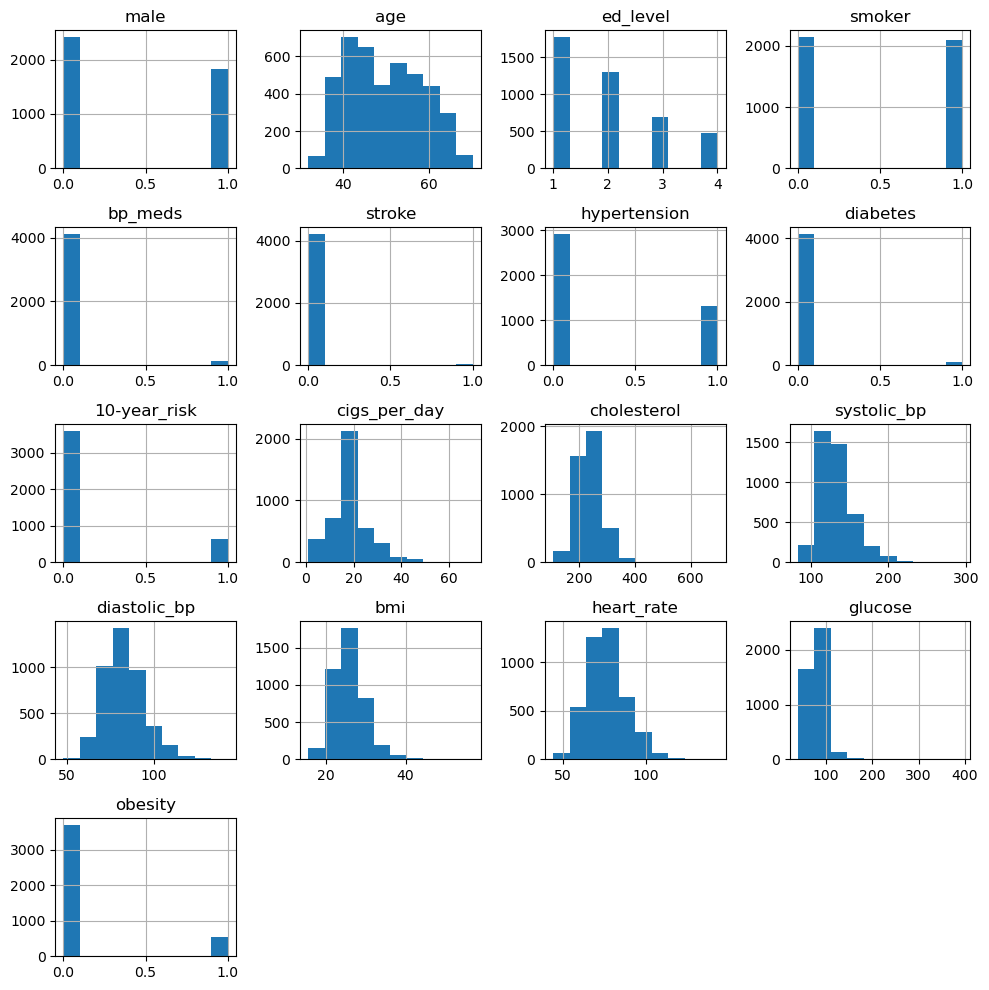

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
data_imp.hist(ax=ax)
fig.tight_layout()
plt.show()

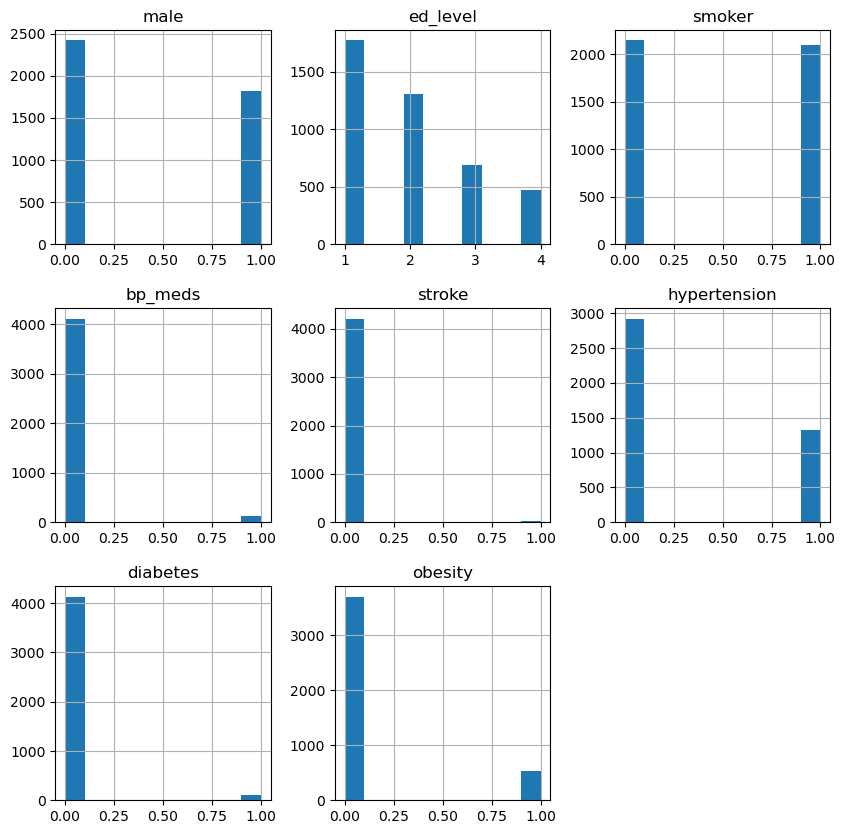

In [32]:
# Histogram of categorical features

features_cat = features[['male', 'ed_level', 'smoker', 'bp_meds', 'stroke', 'hypertension', 'diabetes', 'obesity']]

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
features_cat.hist(ax=ax)
plt.show()

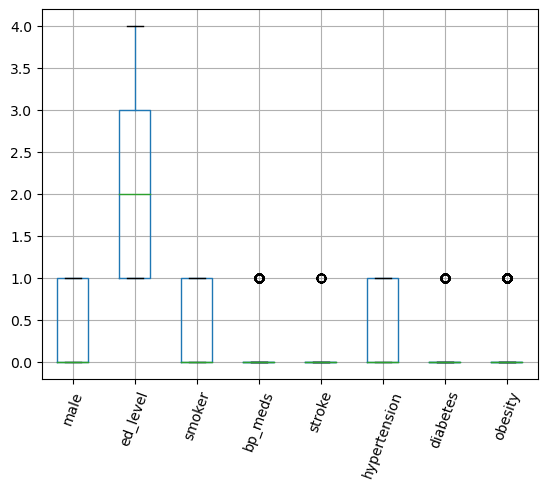

In [33]:
#Box plot of categorical features

features_cat.boxplot()
plt.xticks(rotation=70)
plt.show()

In [34]:
features_cat_cor = features_cat.corr()
features_cat_cor

,male,ed_level,smoker,bp_meds,stroke,hypertension,diabetes,obesity
male,1.000000,0.016976,0.197026,-0.051544,-0.004550,0.005853,0.015693,-0.020546
ed_level,0.016976,1.000000,0.018961,-0.009825,-0.034108,-0.080849,-0.039104,-0.104907
smoker,0.197026,0.018961,1.000000,-0.048348,-0.032980,-0.103710,-0.044285,-0.109499
bp_meds,-0.051544,-0.009825,-0.048348,1.000000,0.114614,0.258580,0.051407,0.076632
stroke,-0.004550,-0.034108,-0.032980,0.114614,1.000000,0.074791,0.006955,0.016849
hypertension,0.005853,-0.080849,-0.103710,0.258580,0.074791,1.000000,0.077752,0.222743
diabetes,0.015693,-0.039104,-0.044285,0.051407,0.006955,0.077752,1.000000,0.067749
obesity,-0.020546,-0.104907,-0.109499,0.076632,0.016849,0.222743,0.067749,1.000000


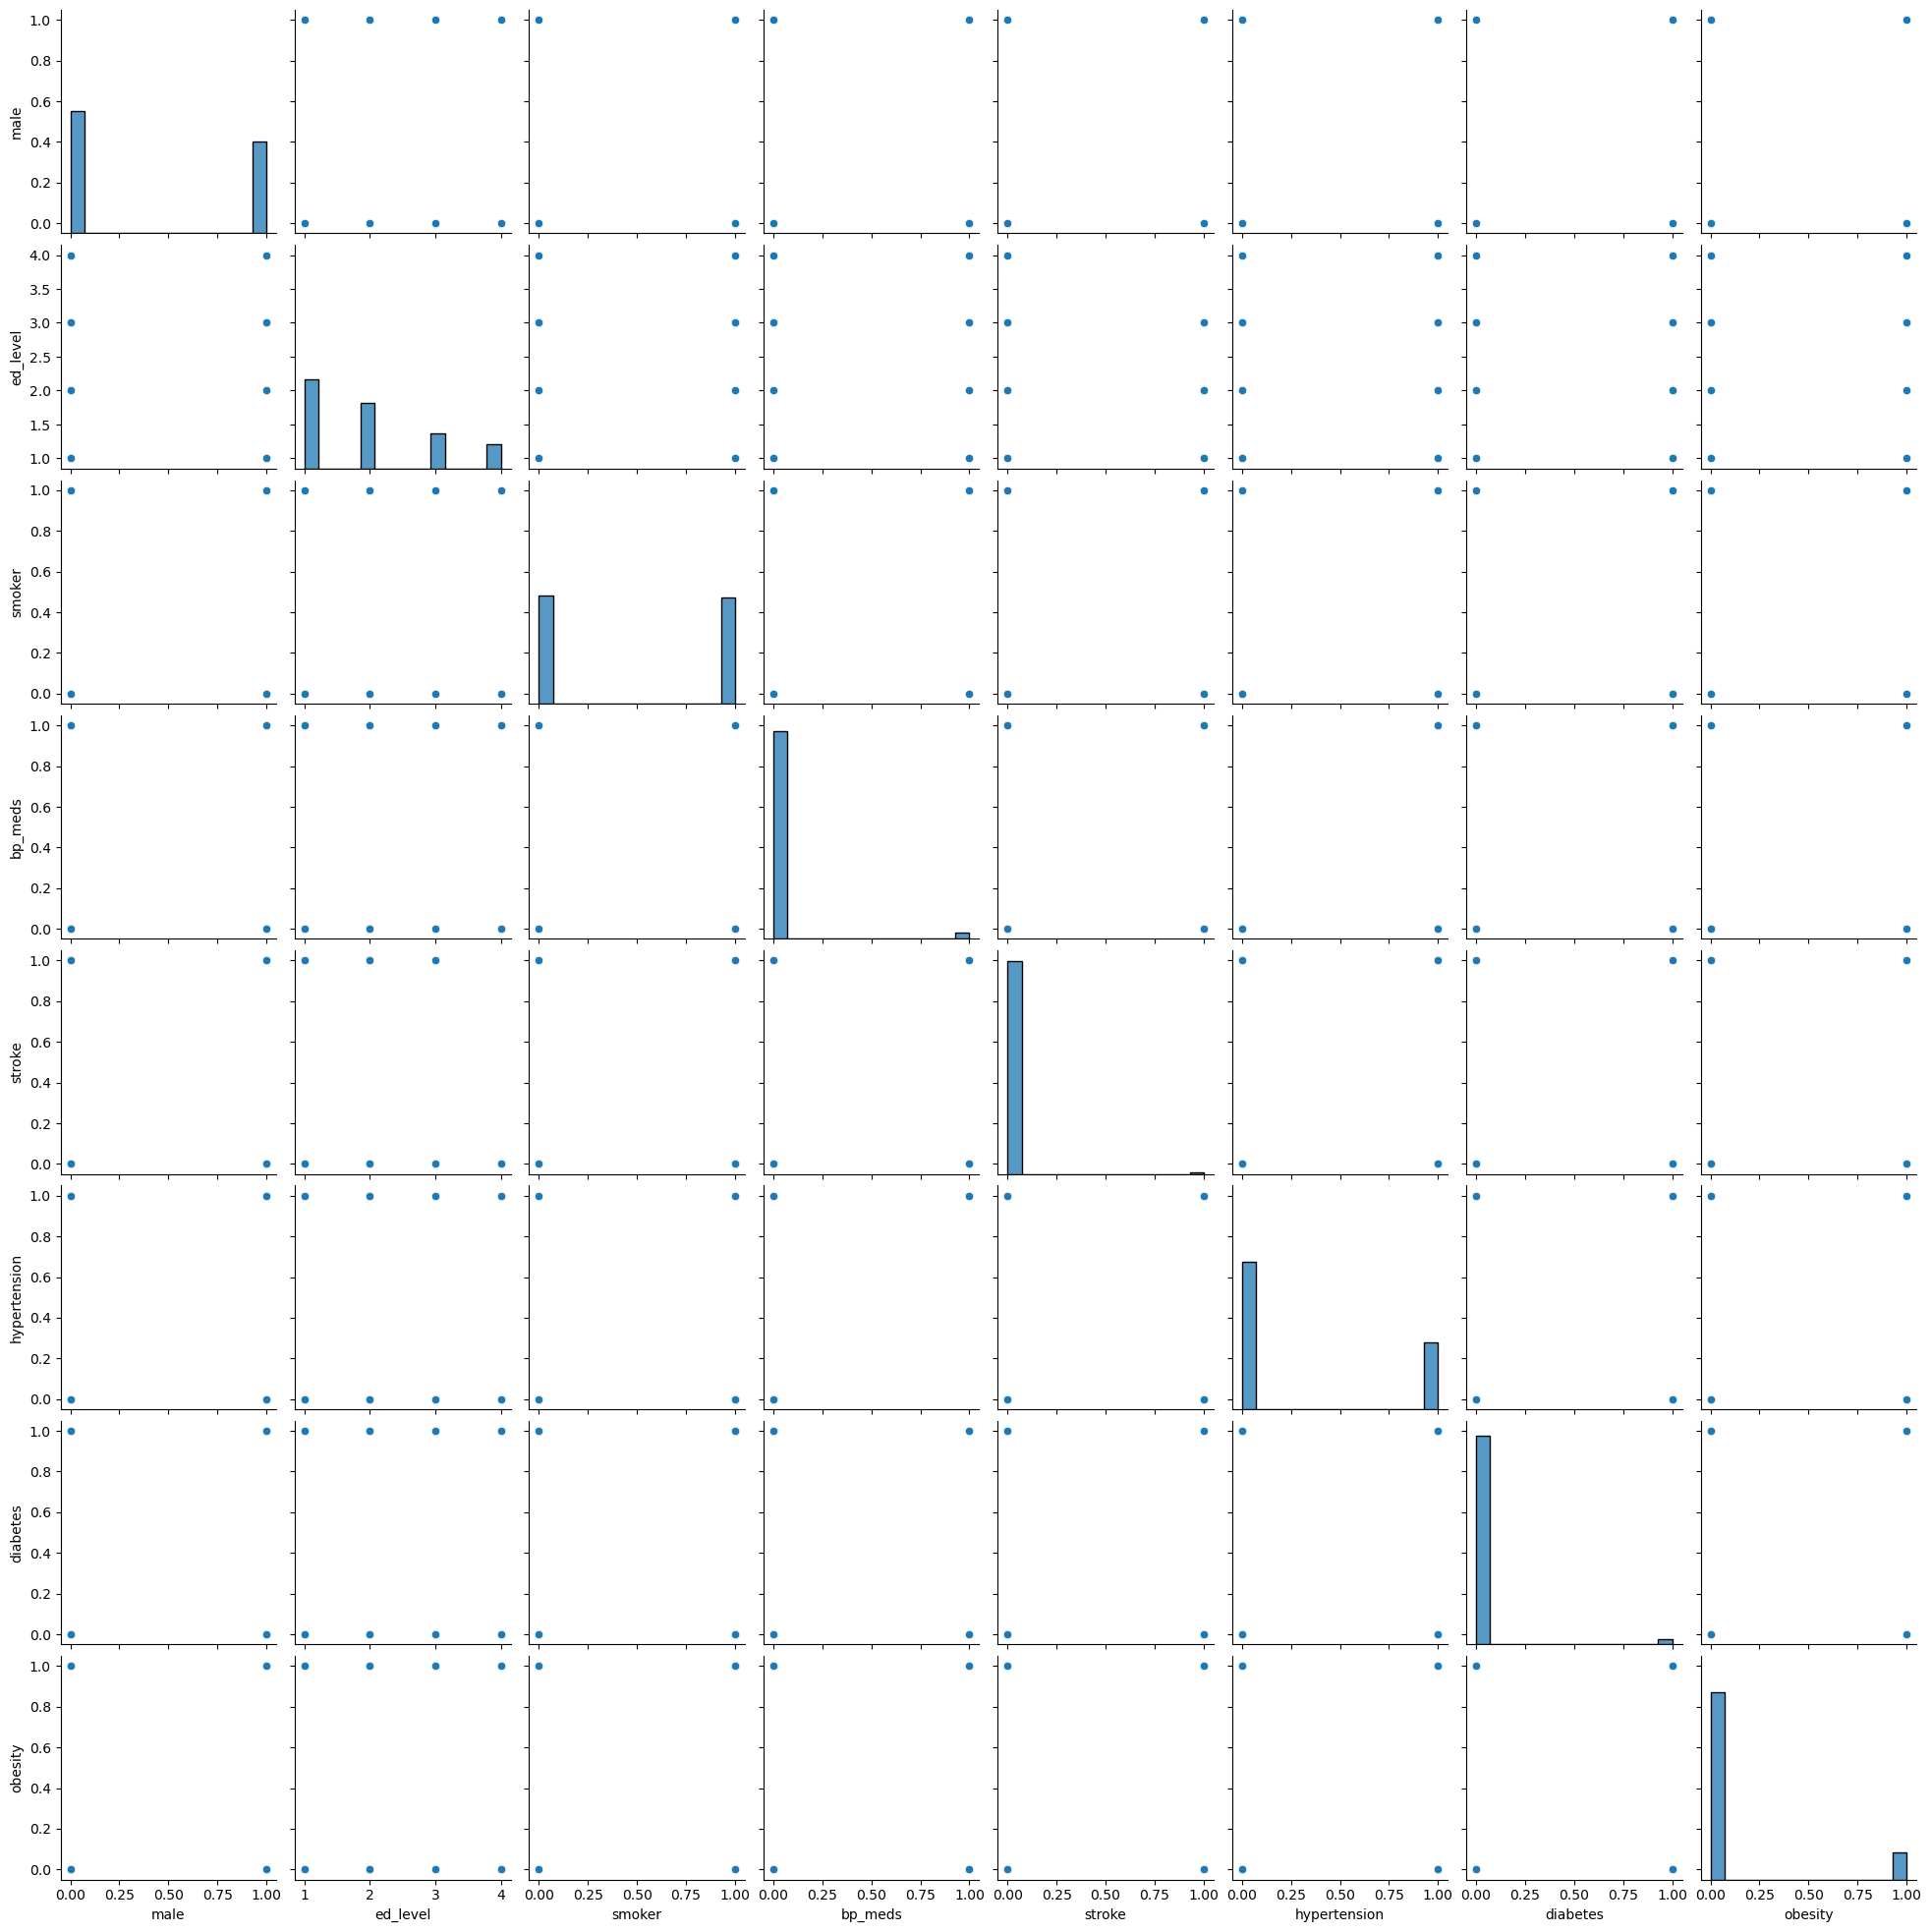

In [35]:
# Scatterplot of categorical features

import seaborn as sns


sns.pairplot(features_cat)
plt.show()

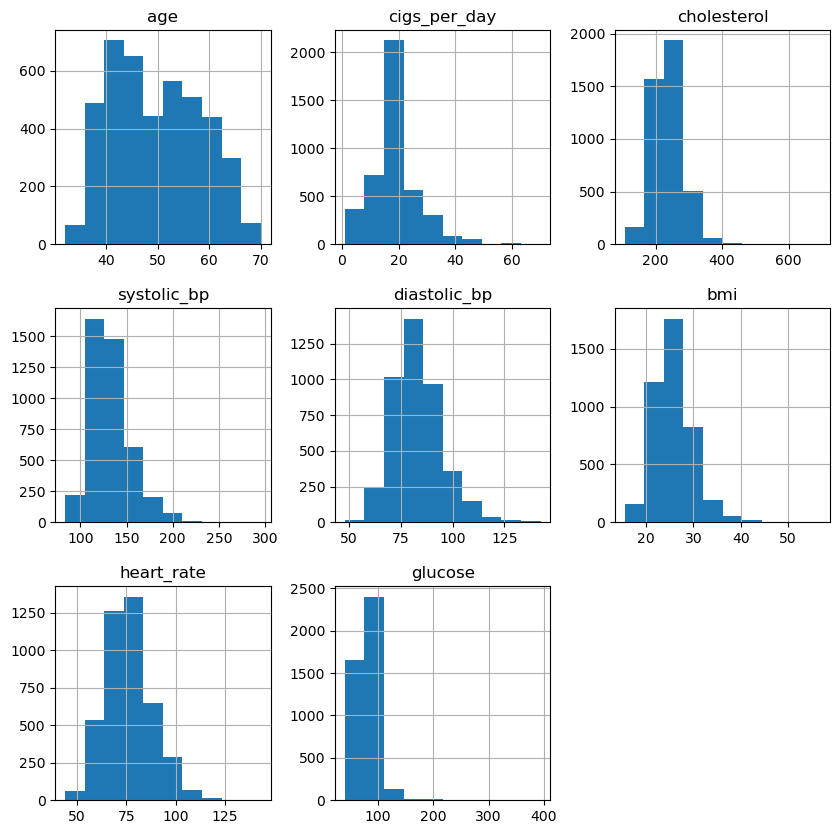

In [36]:
# Histogram of numerical features

features_num = features[['age', 'cigs_per_day', 'cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']]

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
features_num.hist(ax=ax)
plt.show()

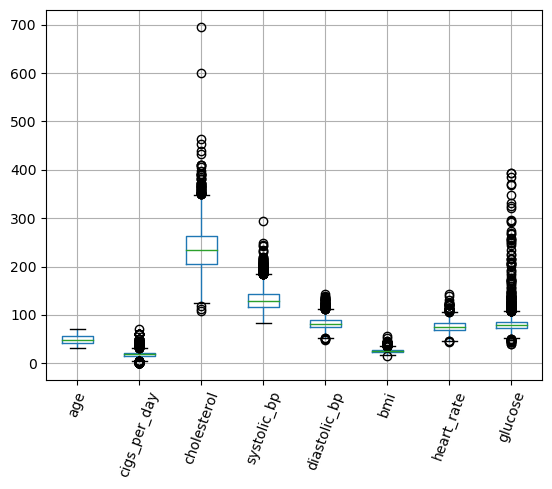

In [37]:
#Boxplot of numerical features

features_num.boxplot()
plt.xticks(rotation=70)
plt.show()

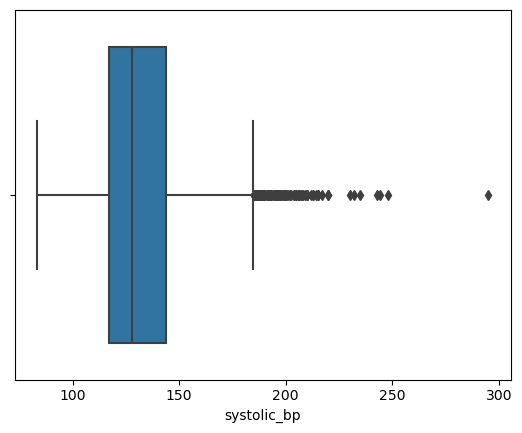

In [38]:
# Identify outlier in systolic_bp

sns.boxplot(features_num['systolic_bp'])
plt.show()

In [39]:
data_imp['systolic_bp'].sort_values(ascending=False)

481     295.0
3489    248.0
864     244.0
1189    243.0
2091    235.0
        ...  
420      90.0
1997     85.5
3578     85.0
2665     83.5
3487     83.5
Name: systolic_bp, Length: 4240, dtype: float64

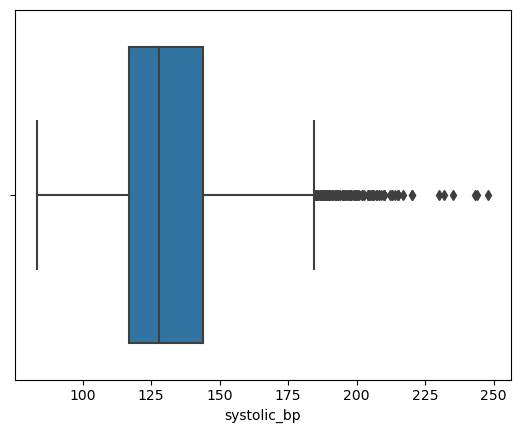

In [40]:
data_imp = data_imp.drop(data_imp[data_imp.systolic_bp >290].index)
sns.boxplot(data_imp.systolic_bp)
plt.show()

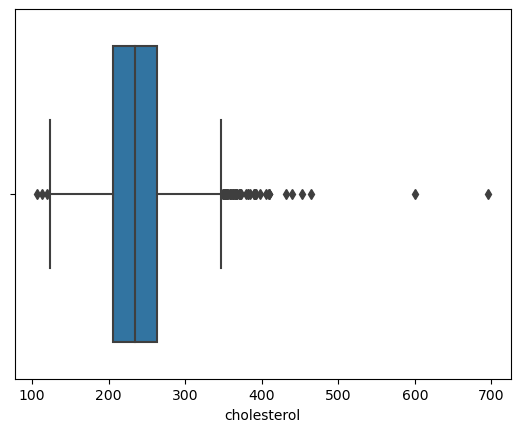

In [41]:
# Identify outlier in cholesterol

sns.boxplot(features_num['cholesterol'])
plt.show()

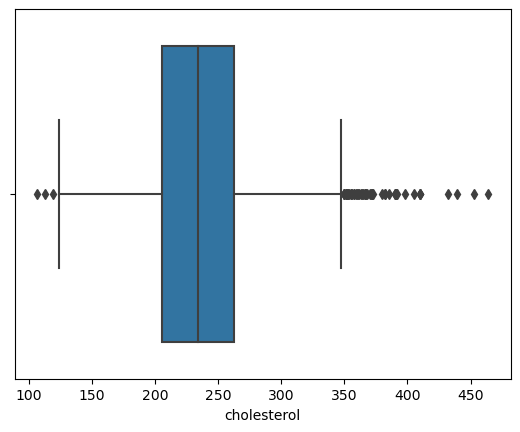

In [42]:
# Drop outlier from df

data_imp = data_imp.drop(data_imp[data_imp.cholesterol >599].index)
sns.boxplot(data_imp.cholesterol)
plt.show()

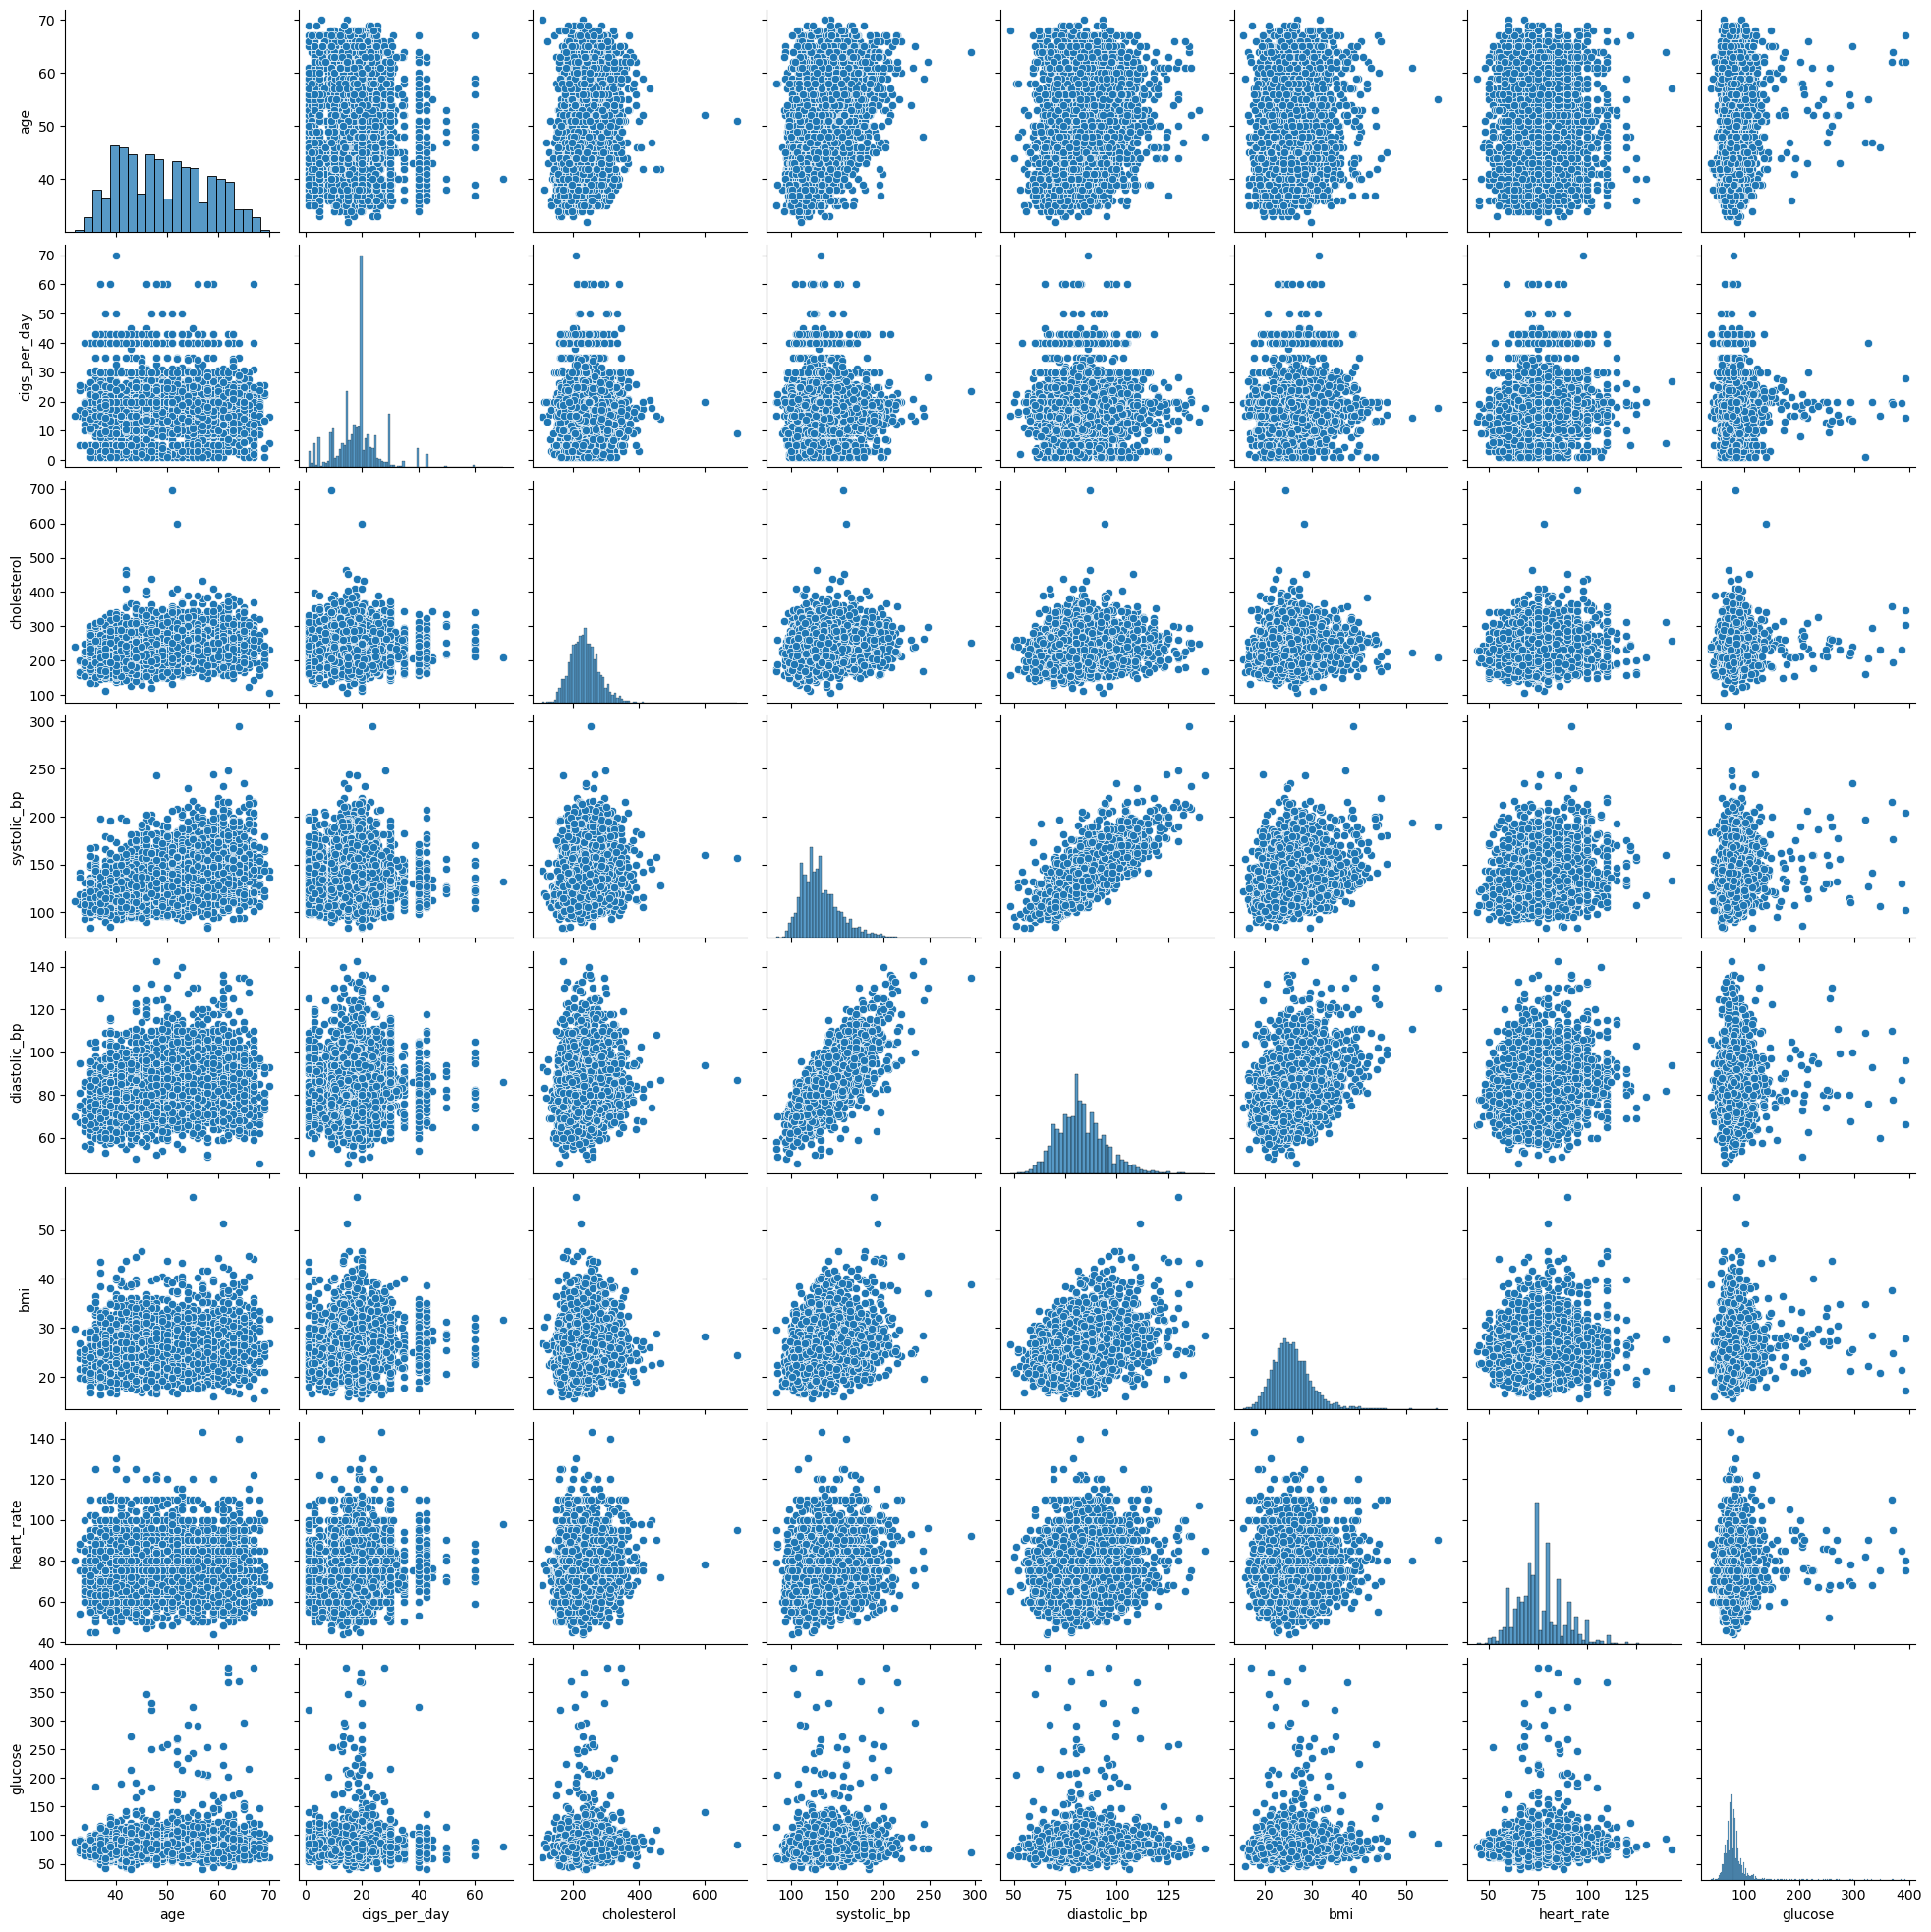

In [43]:
sns.pairplot(features_num)
plt.show()

In [44]:
features_num_cor = features_num.corr()
features_num_cor

,age,cigs_per_day,cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
age,1.000000,-0.023052,0.263260,0.394053,0.205586,0.136965,-0.012471,0.119729
cigs_per_day,-0.023052,1.000000,0.024006,0.013102,0.032649,0.058256,0.072274,-0.031559
cholesterol,0.263260,0.024006,1.000000,0.209868,0.165449,0.117035,0.090602,0.044218
systolic_bp,0.394053,0.013102,0.209868,1.000000,0.783952,0.326625,0.182463,0.140652
diastolic_bp,0.205586,0.032649,0.165449,0.783952,1.000000,0.377873,0.180849,0.059921
bmi,0.136965,0.058256,0.117035,0.326625,0.377873,1.000000,0.068420,0.083219
heart_rate,-0.012471,0.072274,0.090602,0.182463,0.180849,0.068420,1.000000,0.094896
glucose,0.119729,-0.031559,0.044218,0.140652,0.059921,0.083219,0.094896,1.000000


# Target Exploration

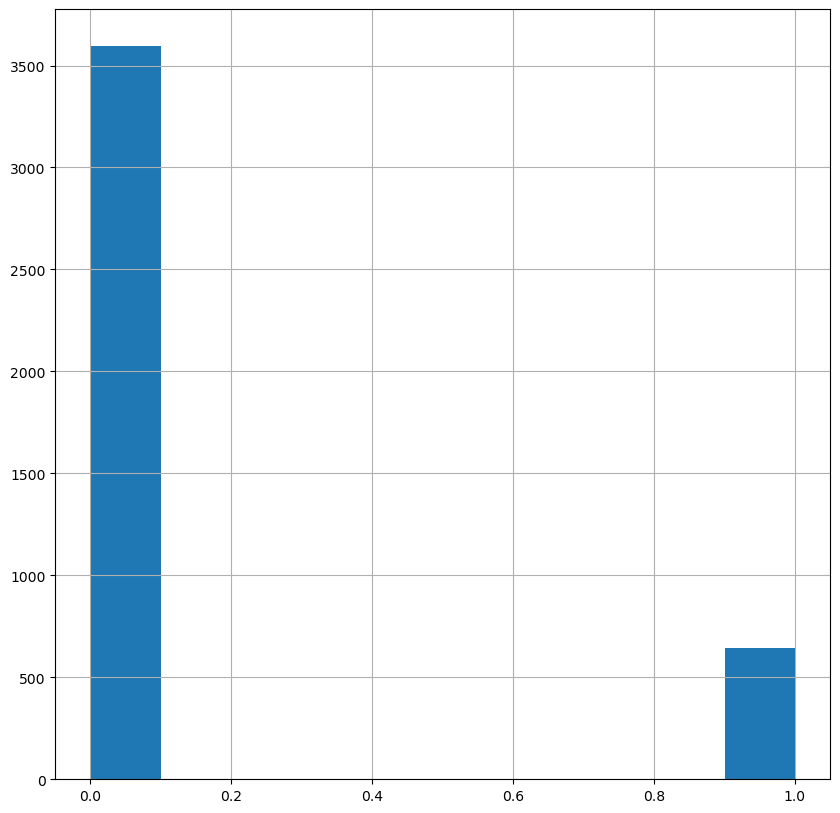

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
target.hist(ax=ax)
plt.show()

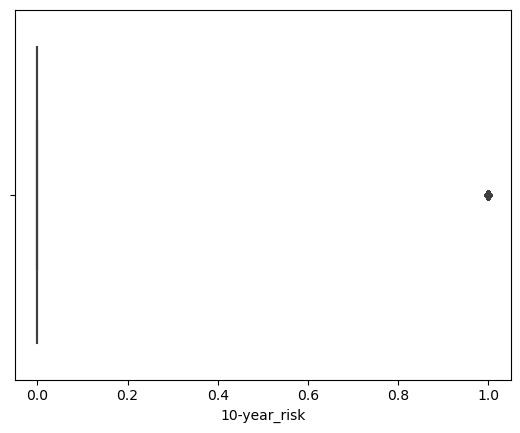

In [46]:
sns.boxplot(target)
plt.show()

0.0    3596
1.0     644
Name: 10-year_risk, dtype: int64


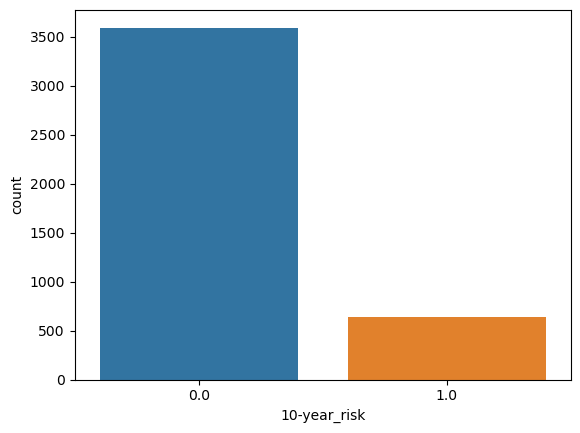

In [47]:
print(target.value_counts())
sns.countplot(x='10-year_risk', data=data_imp)
plt.show()

In [48]:
#Feature scaling to normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

#Assign scaler to column:
data_scaled = pd.DataFrame(scaler.fit_transform(data_imp), columns=data_imp.columns)
data_scaled.describe()



,male,age,ed_level,smoker,bp_meds,stroke,hypertension,diabetes,10-year_risk,cigs_per_day,cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,obesity
count,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000
mean,0.429313,0.462523,0.322949,0.494218,0.029266,0.005900,0.310125,0.025490,0.151522,0.253411,0.362870,0.296681,0.369120,0.248533,0.321947,0.118405,0.126977
std,0.495037,0.225605,0.337785,0.500026,0.168571,0.076596,0.462599,0.157626,0.358600,0.121068,0.121779,0.133080,0.125781,0.098632,0.121447,0.064912,0.332986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194203,0.277311,0.203647,0.285714,0.182501,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263768,0.355742,0.270517,0.359788,0.238972,0.313131,0.107345,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.292754,0.436975,0.364742,0.439153,0.302957,0.393939,0.129944,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Normalize data set based on a balanced size of the Target Variable
shuffled_CHD = data_scaled.sample(frac=1, random_state=4)

CHD_risk = shuffled_CHD.loc[shuffled_CHD['10-year_risk']==1]

# Created a sample equal to the CHD class
non_CHD = shuffled_CHD.loc[shuffled_CHD['10-year_risk'] ==0].sample(642, random_state=42)

norm_CHD = pd.concat([CHD_risk, non_CHD])
print(norm_CHD.info())
norm_CHD.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 328 to 823
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          1284 non-null   float64
 1   age           1284 non-null   float64
 2   ed_level      1284 non-null   float64
 3   smoker        1284 non-null   float64
 4   bp_meds       1284 non-null   float64
 5   stroke        1284 non-null   float64
 6   hypertension  1284 non-null   float64
 7   diabetes      1284 non-null   float64
 8   10-year_risk  1284 non-null   float64
 9   cigs_per_day  1284 non-null   float64
 10  cholesterol   1284 non-null   float64
 11  systolic_bp   1284 non-null   float64
 12  diastolic_bp  1284 non-null   float64
 13  bmi           1284 non-null   float64
 14  heart_rate    1284 non-null   float64
 15  glucose       1284 non-null   float64
 16  obesity       1284 non-null   float64
dtypes: float64(17)
memory usage: 180.6 KB
None


,male,age,ed_level,smoker,bp_meds,stroke,hypertension,diabetes,10-year_risk,cigs_per_day,cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,obesity
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.00000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,0.477414,0.512174,0.297767,0.507009,0.043614,0.010903,0.38785,0.044393,0.500000,0.260590,0.371650,0.324672,0.385971,0.259468,0.323224,0.127061,0.151869
std,0.499684,0.223911,0.342733,0.500146,0.204314,0.103889,0.48745,0.206046,0.500195,0.123006,0.126212,0.148081,0.135806,0.105510,0.121056,0.090141,0.359034
min,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010179,0.060606,0.000000,0.000000
25%,0.000000,0.315789,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.202174,0.288515,0.221884,0.296296,0.189469,0.242424,0.090395,0.000000
50%,0.000000,0.500000,0.333333,1.000000,0.000000,0.000000,0.00000,0.000000,0.500000,0.275362,0.361345,0.294833,0.370370,0.250727,0.313131,0.110169,0.000000
75%,1.000000,0.710526,0.666667,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.304348,0.445378,0.404255,0.465608,0.314651,0.393939,0.135593,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.855072,1.000000,1.000000,0.973545,1.000000,0.818182,1.000000,1.000000


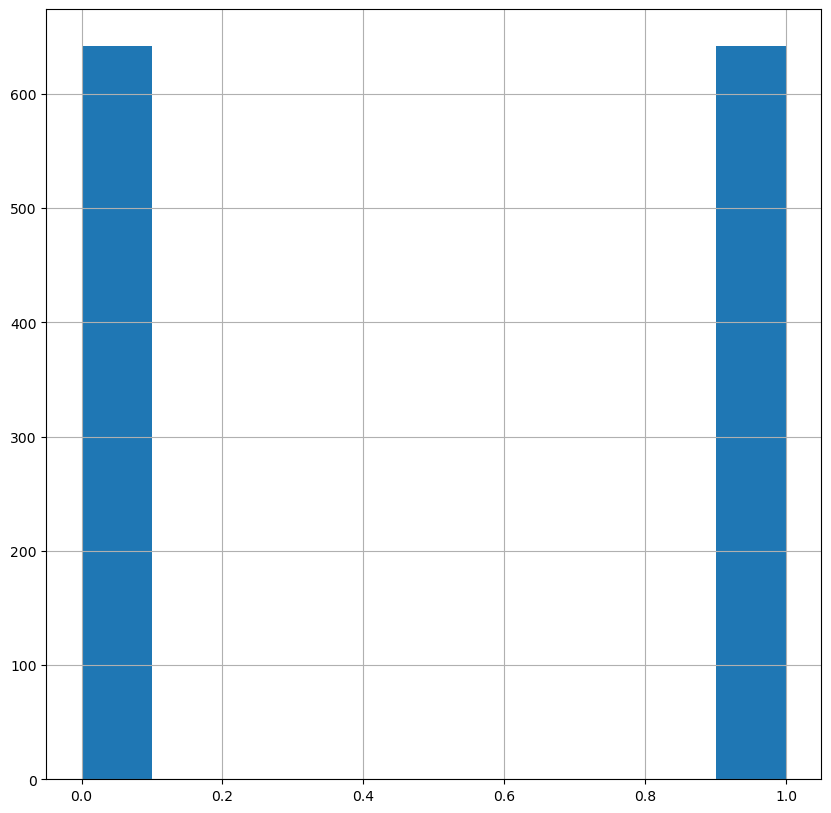

In [50]:
#Inspect the distribution of 0 and 1 values in 10-year_risk

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
norm_CHD['10-year_risk'].hist(ax=ax)

plt.show() 

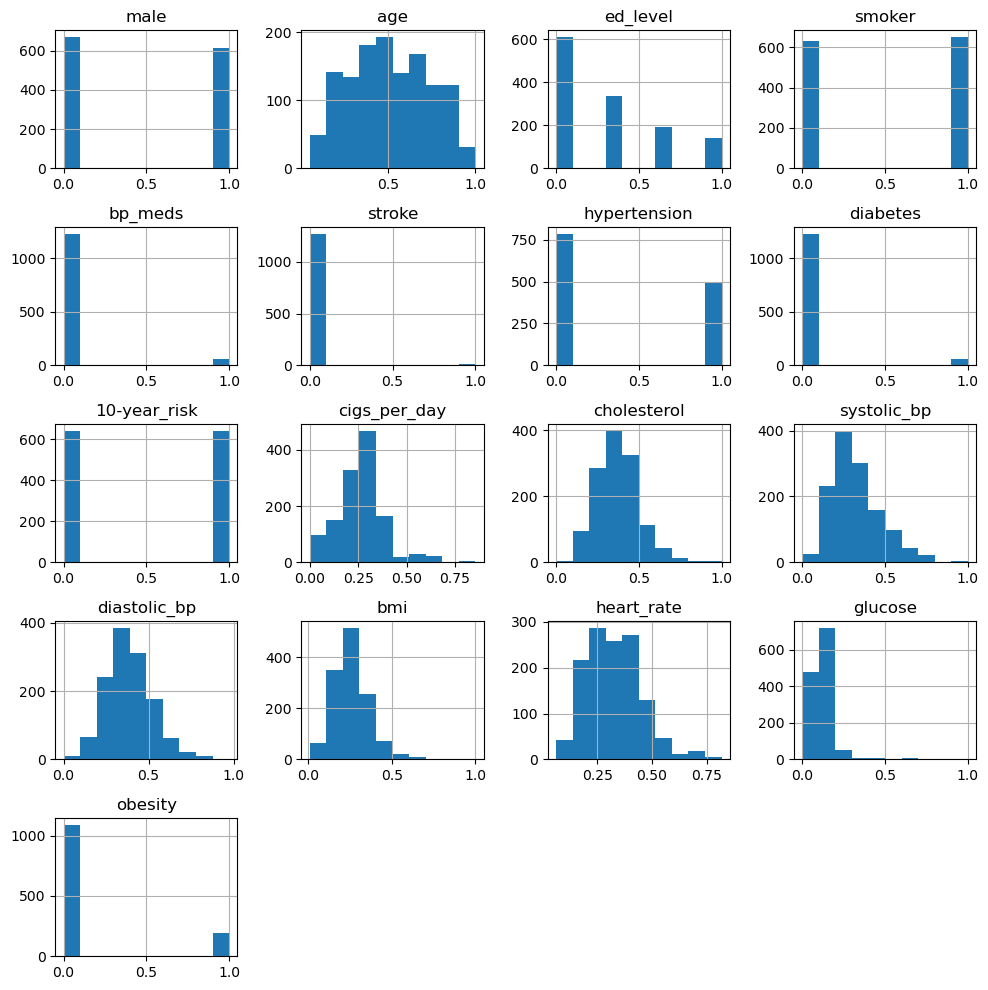

In [51]:
# Check shape
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
norm_CHD.hist(ax=ax)
fig.tight_layout()
plt.show() 

# Correlation

In [52]:
norm_CHD.corr()

,male,age,ed_level,smoker,bp_meds,stroke,hypertension,diabetes,10-year_risk,cigs_per_day,cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,obesity
male,1.000000,-0.032005,0.038542,0.237659,-0.043785,-0.025281,-0.031207,0.005961,0.113823,0.214443,-0.083473,-0.048180,0.035339,0.034219,-0.101979,0.003104,-0.039517
age,-0.032005,1.000000,-0.144651,-0.204980,0.122441,0.102744,0.331051,0.114982,0.314079,-0.027525,0.193472,0.394357,0.180502,0.123017,-0.000058,0.150592,0.078785
ed_level,0.038542,-0.144651,1.000000,-0.011428,-0.018644,-0.076661,-0.088431,-0.058563,-0.052285,0.014072,0.012356,-0.119904,-0.040314,-0.128056,-0.068193,-0.041634,-0.105977
smoker,0.237659,-0.204980,-0.011428,1.000000,-0.094523,-0.046474,-0.132647,-0.037057,0.023367,0.028602,-0.037984,-0.128234,-0.099666,-0.127457,0.061182,-0.062439,-0.090573
bp_meds,-0.043785,0.122441,-0.018644,-0.094523,1.000000,0.087740,0.268282,0.065060,0.099147,-0.038438,0.101005,0.287472,0.213112,0.064750,0.075773,0.088078,0.026514
stroke,-0.025281,0.102744,-0.076661,-0.046474,0.087740,1.000000,0.101122,0.013782,0.059996,-0.024335,-0.011074,0.078008,0.056039,0.057069,-0.008131,0.018876,0.018260
hypertension,-0.031207,0.331051,-0.088431,-0.132647,0.268282,0.101122,1.000000,0.069009,0.236557,0.005505,0.131775,0.699711,0.589735,0.259012,0.145214,0.095466,0.202055
diabetes,0.005961,0.114982,-0.058563,-0.037057,0.065060,0.013782,0.069009,1.000000,0.079407,-0.027855,0.040340,0.117821,0.041845,0.098694,0.074505,0.703041,0.066834
10-year_risk,0.113823,0.314079,-0.052285,0.023367,0.099147,0.059996,0.236557,0.079407,1.000000,0.070170,0.110068,0.264880,0.188745,0.056644,0.043492,0.109263,0.028211
cigs_per_day,0.214443,-0.027525,0.014072,0.028602,-0.038438,-0.024335,0.005505,-0.027855,0.070170,1.000000,0.014298,-0.009945,0.008367,0.022749,0.100621,-0.022907,0.029764


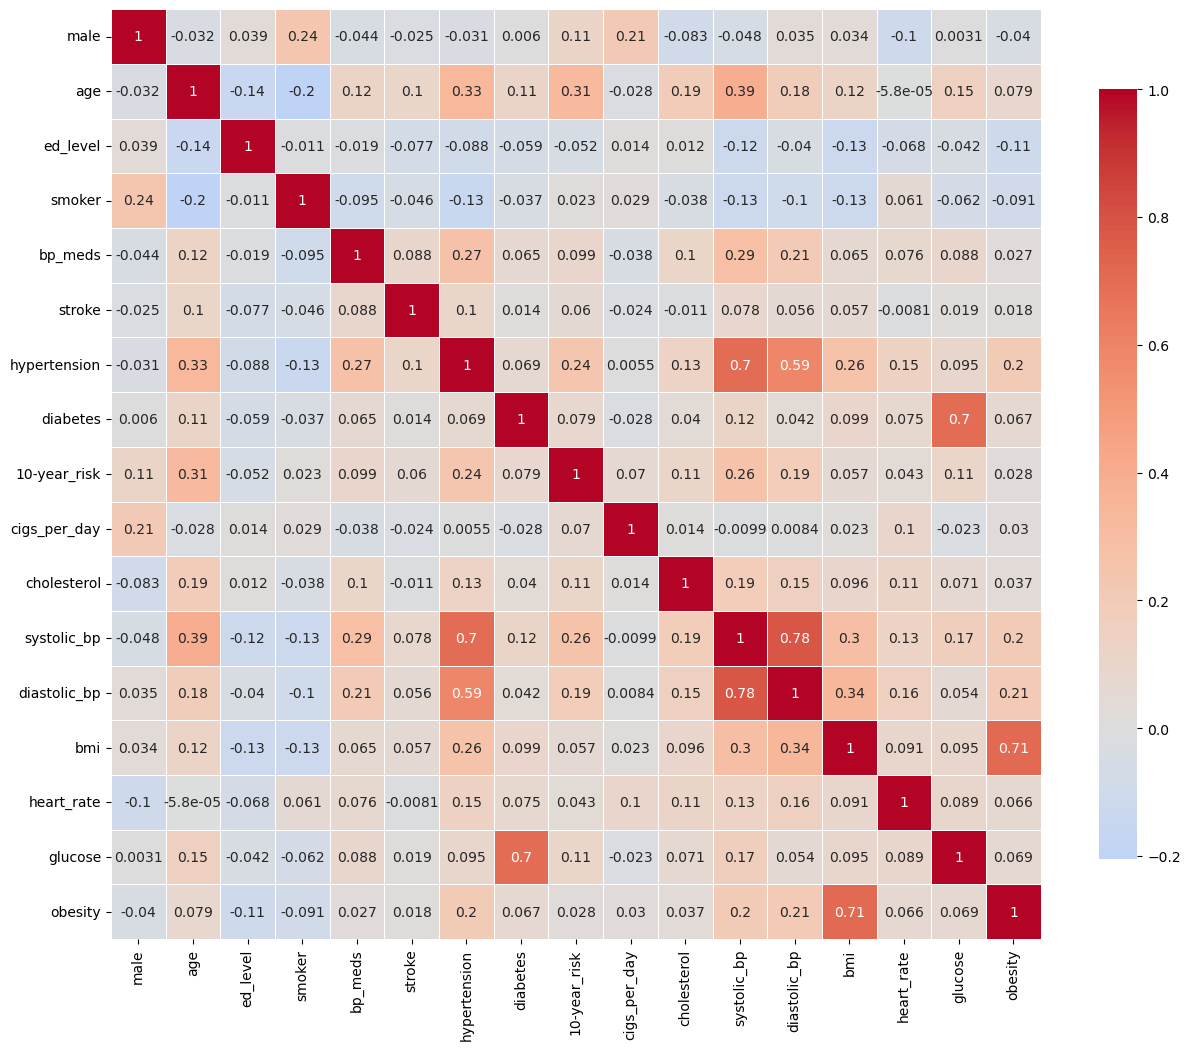

In [53]:
plt.figure(figsize=(15,20))
sns.heatmap(norm_CHD.corr(), cmap='coolwarm', center=0, square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .5})
plt.show()

# Feature Selection

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = norm_CHD.drop(['10-year_risk'], axis=1)
y = norm_CHD['10-year_risk']

best_features = SelectKBest(score_func=chi2, k=16)
fit = best_features.fit(X,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

features_scores = pd.concat([data_columns, data_scores], axis=1)
features_scores.columns =['Specs', 'Scores']
print(features_scores.sort_values(by='Scores', ascending=False))

           Specs     Scores
6   hypertension  43.983936
1            age  12.389061
4        bp_meds  12.071429
0           male   8.693312
7       diabetes   7.736842
10   systolic_bp   6.079625
5         stroke   4.571429
11  diastolic_bp   2.184025
2       ed_level   1.383609
14       glucose   0.979495
15       obesity   0.866667
9    cholesterol   0.666218
8   cigs_per_day   0.366793
3         smoker   0.345622
12           bmi   0.176622
13    heart_rate   0.110030


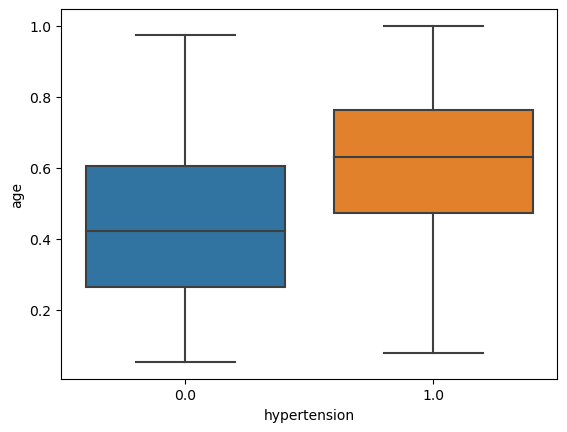

In [98]:
ax = sns.boxplot(x='hypertension', y='age' , data=norm_CHD)

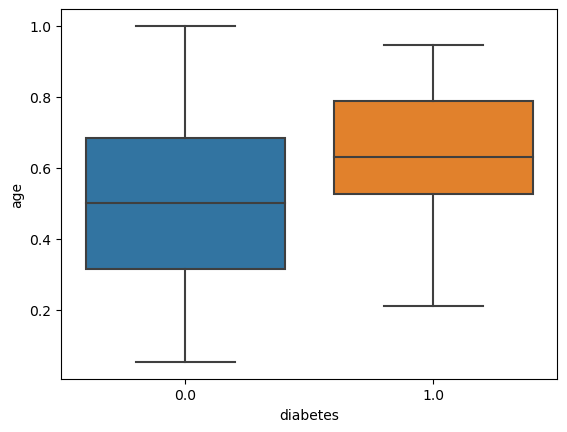

In [99]:
ax = sns.boxplot(x='diabetes', y='age' , data=norm_CHD)

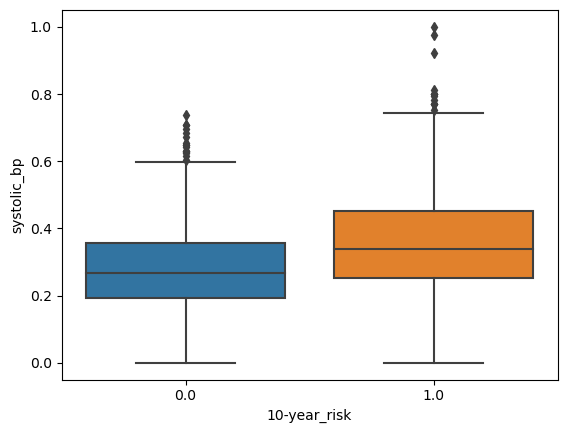

In [55]:
ax = sns.boxplot(x='10-year_risk', y='systolic_bp' , data=norm_CHD)


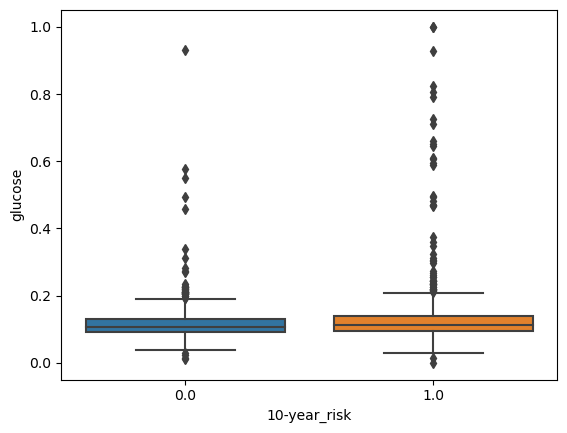

In [56]:
ax = sns.boxplot(x='10-year_risk', y='glucose' , data=norm_CHD)

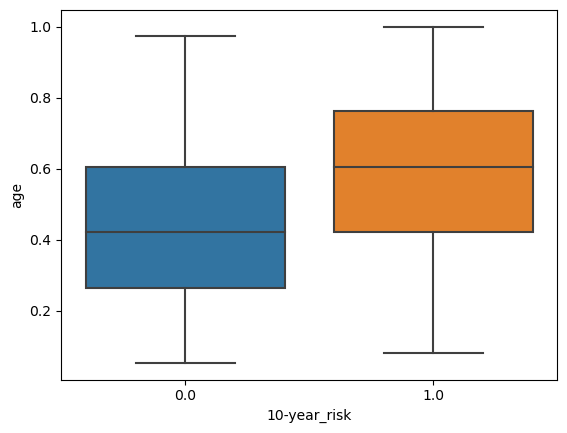

In [57]:
ax = sns.boxplot(x='10-year_risk', y='age' , data=norm_CHD)

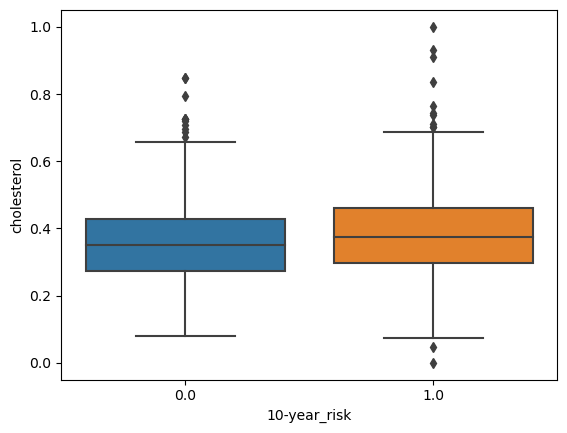

In [58]:
ax = sns.boxplot(x='10-year_risk', y='cholesterol' , data=norm_CHD)

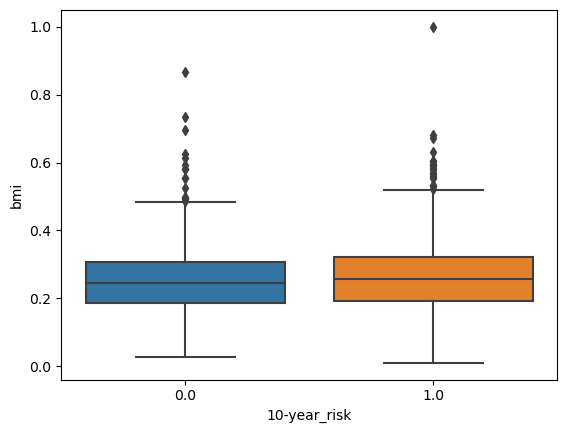

In [59]:
ax = sns.boxplot(x='10-year_risk', y='bmi' , data=norm_CHD)

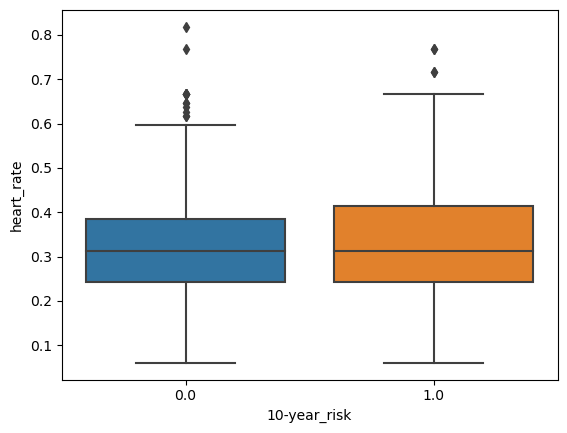

In [60]:
ax = sns.boxplot(x='10-year_risk', y='heart_rate' , data=norm_CHD)

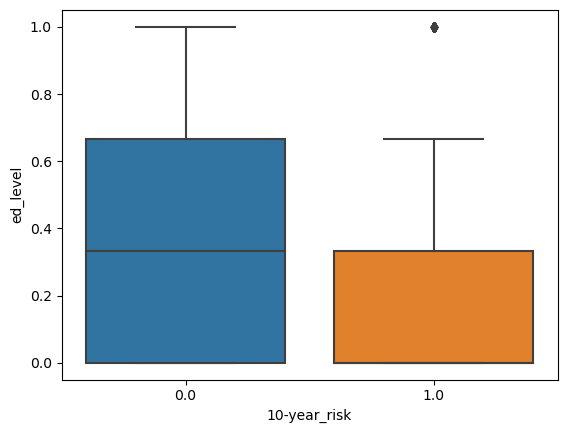

In [61]:
ax = sns.boxplot(x='10-year_risk', y='ed_level' , data=norm_CHD)

In [62]:
# Selected features and dropped insignificant features
norm_CHD=norm_CHD.drop(['glucose', 'obesity', 'cholesterol', 'cigs_per_day','heart_rate','smoker','bmi'],axis=1)



# ML Model Training
1. Decision Tree Classifier
1. Decision Tree Classifier
3. Logistic Regression
4. Support Vector Machine
5. K-nearest neighbor

# 1. Decision Tree Classifier

In [63]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = norm_CHD.drop(['10-year_risk'], axis=1)
y = norm_CHD['10-year_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
# Course-Graind Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,5,10,20,40],
    'min_samples_leaf': [5,10,15,20,25]
}
DTC1 = DecisionTreeClassifier()
grid_DTC1 = GridSearchCV(estimator=DTC1, param_grid = param_grid, cv=5)
grid_DTC1.fit(X_train, y_train)


# Grid Search
print("\n The best score across ALL searched params:\n",grid_DTC1.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DTC1.best_params_)


 The best score across ALL searched params:
 0.633885863130476

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


Text(0.5, 1.1, 'Confusion matrix Decision Tree Classifier\n')

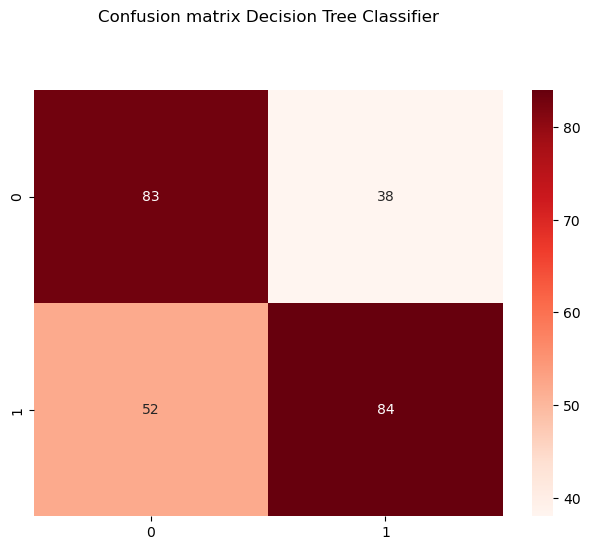

In [65]:
from sklearn.metrics import confusion_matrix
cnf_DTC = confusion_matrix(y_test, (grid_DTC1.predict(X_test)))

sns.heatmap(pd.DataFrame(cnf_DTC), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree Classifier\n', y=1.1)


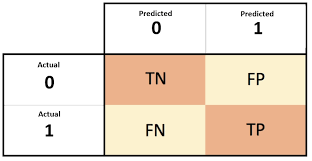

In [130]:
# Refined Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [5,7,10,13,16,18]
}
DTC2 = DecisionTreeClassifier()
grid_DTC2 = GridSearchCV(estimator=DTC2, param_grid = param_grid, cv=10)
grid_DTC2.fit(X_train, y_train)

# Accuracy of training prediction
acc_DTC2 = grid_DTC2.score(X_train, y_train)
print(f'Accuracy Test: {acc_DTC2}%')


# Grid Search
print("\n The best score across ALL searched params:\n", grid_DTC2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DTC2.best_params_)

Accuracy Test: 0.6893865628042843%

 The best score across ALL searched params:
 0.6358176280220824

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 13}


In [67]:
#Accuracy of test prediction

DTC_pred = grid_DTC2.predict(X_test)

DTC_acc = accuracy_score(y_test, DTC_pred)
DTC_prec = precision_score(y_test, DTC_pred, average="weighted")
DTC_rec = recall_score(y_test, DTC_pred, average="weighted") 
DTC_spec = recall_score(y_test, DTC_pred, average="weighted", pos_label=0)
DTC_F1_score = f1_score(y_test, DTC_pred, average = 'weighted')
DTC_roc_auc = roc_auc_score(y_test, DTC_pred)

print(f'Accuracy Test: {round(DTC_acc,4)*100}%')
print(f'Precision: {round(DTC_prec,4)*100}%')
print(f'Recall: {round(DTC_rec,4)*100}%')
print(f'Specificity: {round(DTC_spec,4)*100}%')
print(f'F1: {round(DTC_F1_score,4)*100}%')
print(f'ROC_AUC: {round(DTC_roc_auc,4)*100}%')

Accuracy Test: 66.93%
Precision: 67.47999999999999%
Recall: 66.93%
Specificity: 66.93%
F1: 66.91%
ROC_AUC: 67.2%


Text(0.5, 1.1, 'Confusion matrix Decision Tree Classifier\n')

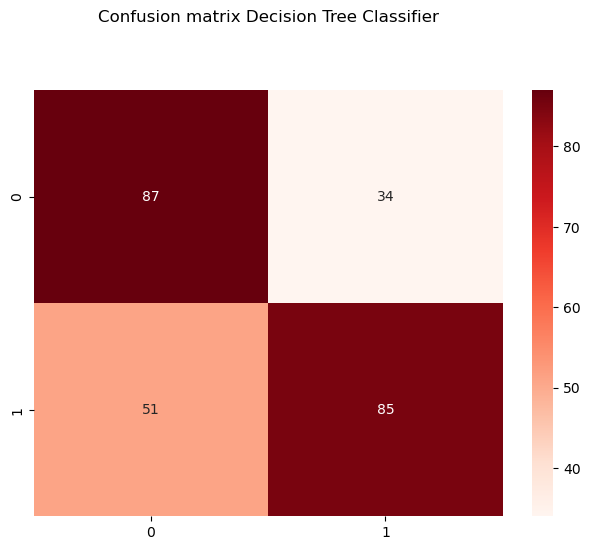

In [68]:
from sklearn.metrics import confusion_matrix
cnf_DTC = confusion_matrix(y_test, DTC_pred)

sns.heatmap(pd.DataFrame(cnf_DTC), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree Classifier\n', y=1.1)


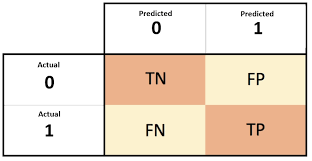

# 2. Random Forest Classifier

In [69]:
# Coarse-Grained RandomForestClassifier GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [2, 4, 8, 16, 32],
    'n_estimators': [100, 250, 500, 750, 1000],
    'min_samples_split': [2, 5, 10, 15, 20],
}

RFC1 = RandomForestClassifier()
grid_RFC1 = GridSearchCV(estimator=RFC1, param_grid = param_grid, cv=5, n_jobs=-1, verbose=3)
grid_RFC1.fit(X_train, y_train)

#Parameters
print("\n The best score across ALL searched params:\n",grid_RFC1.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFC1.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits

 The best score across ALL searched params:
 0.6572531375799195

 The best parameters across ALL searched params:
 {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}


Text(0.5, 1.1, 'Confusion matrix Random Forest Classifier\n')

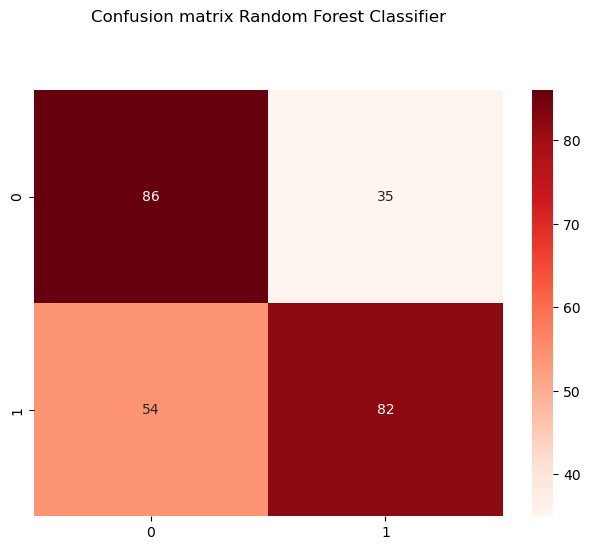

In [70]:
cnf_RFC = confusion_matrix(y_test, (grid_RFC1.predict(X_test)))

sns.heatmap(pd.DataFrame(cnf_RFC), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Random Forest Classifier\n', y=1.1)

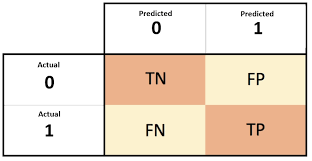

In [71]:
# Refined RandomForestClassifier GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [2,4,6,8,10],
    'n_estimators': [90,100,110,120,130],
    'min_samples_split': [25,30,35,40,45],
}

RFC2 = RandomForestClassifier()
grid_RFC2 = GridSearchCV(estimator=RFC2, param_grid = param_grid, cv=10, n_jobs=-1, verbose=3)
grid_RFC2.fit(X_train, y_train)


#Parameters
print("\n The best score across ALL searched params:\n",grid_RFC2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFC2.best_params_)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits

 The best score across ALL searched params:
 0.6659813439939082

 The best parameters across ALL searched params:
 {'max_depth': 6, 'min_samples_split': 30, 'n_estimators': 130}


In [72]:
# Final RandomForestClassifier GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### ENTER CODE HERE ###
param_grid = {
    'max_depth': [10,20,30,40,50],
    'n_estimators': [90,100,110,120,130],
    'min_samples_split': [6,8,10,12,14],
}

RFC3 = RandomForestClassifier()
grid_RFC3 = GridSearchCV(estimator=RFC3, param_grid = param_grid, cv=15, n_jobs=-1, verbose=3)
grid_RFC3.fit(X_train, y_train)

#Accuracy of training prediction
acc_RFC3 = grid_RFC3.score(X_train, y_train)
print('Accuracy of training data: ',acc_RFC3)

#Parameters
print("\n The best score across ALL searched params:\n",grid_RFC3.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFC3.best_params_)

Fitting 15 folds for each of 125 candidates, totalling 1875 fits
Accuracy of training data:  0.8218111002921129

 The best score across ALL searched params:
 0.6650895140664962

 The best parameters across ALL searched params:
 {'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 100}


In [73]:
#Accuracy of test prediction

RFC_pred = grid_RFC2.predict(X_test)

RFC_acc = accuracy_score(y_test, RFC_pred)
RFC_prec = precision_score(y_test, RFC_pred, average="weighted")
RFC_rec = recall_score(y_test, RFC_pred, average="weighted") 
RFC_spec = recall_score(y_test, RFC_pred, average="weighted", pos_label=0)
RFC_F1_score = f1_score(y_test, RFC_pred, average = 'weighted')
RFC_roc_auc = roc_auc_score(y_test, RFC_pred)

print(f'Accuracy Score: {round(RFC_acc,4)*100}%')
print(f'Precision: {round(RFC_prec,4)*100}%')
print(f'Recall: {round(RFC_rec,4)*100}%')
print(f'Specificity: {round(RFC_spec,4)*100}%')
print(f'F1: {round(RFC_F1_score,4)*100}%')
print(f'ROC_AUC: {round(RFC_roc_auc,4)*100}%')

Accuracy Score: 65.75999999999999%
Precision: 66.35%
Recall: 65.75999999999999%
Specificity: 65.75999999999999%
F1: 65.73%
ROC_AUC: 66.05%


Text(0.5, 1.1, 'Confusion matrix Random Forest Classifier\n')

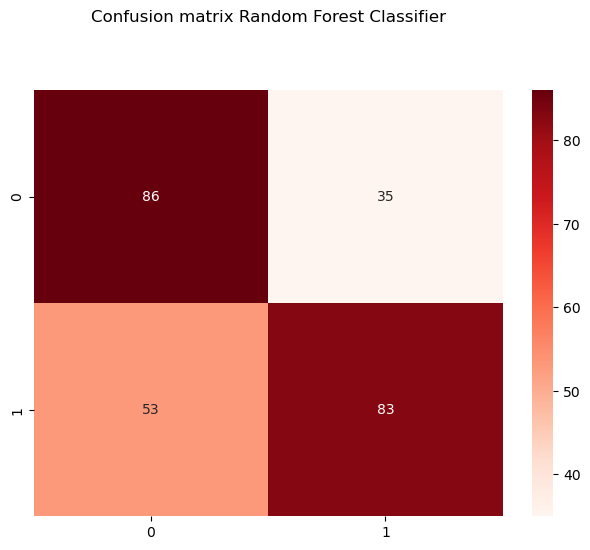

In [74]:
cnf_RFC = confusion_matrix(y_test, RFC_pred)

sns.heatmap(pd.DataFrame(cnf_RFC), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Random Forest Classifier\n', y=1.1)

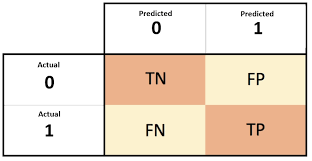

# CHECKPOINT: Feature Scaling

In [178]:
#Feature scaling to normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

#Assign scaler to column:
data_scaled = pd.DataFrame(scaler.fit_transform(norm_CHD), columns=norm_CHD.columns)
data_scaled.describe()


,male,age,ed_level,bp_meds,stroke,hypertension,diabetes,10-year_risk,systolic_bp,diastolic_bp
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.00000,1284.000000,1284.000000,1284.000000,1284.000000
mean,0.477414,0.485073,0.297767,0.043614,0.010903,0.38785,0.044393,0.500000,0.324672,0.396460
std,0.499684,0.236351,0.342733,0.204314,0.103889,0.48745,0.206046,0.500195,0.148081,0.139496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.277778,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.221884,0.304348
50%,0.000000,0.472222,0.333333,0.000000,0.000000,0.00000,0.000000,0.500000,0.294833,0.380435
75%,1.000000,0.694444,0.666667,0.000000,0.000000,1.00000,0.000000,1.000000,0.404255,0.478261
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Comparison of descriptive statistics to scaled features
norm_CHD.describe()

,male,age,ed_level,bp_meds,stroke,hypertension,diabetes,10-year_risk,systolic_bp,diastolic_bp
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.00000,1284.000000,1284.000000,1284.000000,1284.000000
mean,0.477414,0.512174,0.297767,0.043614,0.010903,0.38785,0.044393,0.500000,0.324672,0.385971
std,0.499684,0.223911,0.342733,0.204314,0.103889,0.48745,0.206046,0.500195,0.148081,0.135806
min,0.000000,0.052632,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.315789,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.221884,0.296296
50%,0.000000,0.500000,0.333333,0.000000,0.000000,0.00000,0.000000,0.500000,0.294833,0.370370
75%,1.000000,0.710526,0.666667,0.000000,0.000000,1.00000,0.000000,1.000000,0.404255,0.465608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.973545


In [77]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = data_scaled.drop(['10-year_risk'], axis=1)
y = data_scaled['10-year_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. Logistic Regression

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C": np.logspace(-3,3,7), "penalty":["l1", "l2"]}

lr = LogisticRegression(solver='liblinear')
lr_cv =GridSearchCV(lr, grid, cv=5)
lr_cv.fit(X_train, y_train)

# Accuracy of training prediction
acc_lr = lr_cv.score(X_train, y_train)
print('Accuracy of training data: ',acc_lr)

print("\n The best score across ALL searched params:\n", (lr_cv.best_params_))
print("\n The best parameters across ALL searched params:\n",(lr_cv.best_score_))

Accuracy of training data:  0.6630963972736125

 The best score across ALL searched params:
 {'C': 1.0, 'penalty': 'l1'}

 The best parameters across ALL searched params:
 0.6650722235377693


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

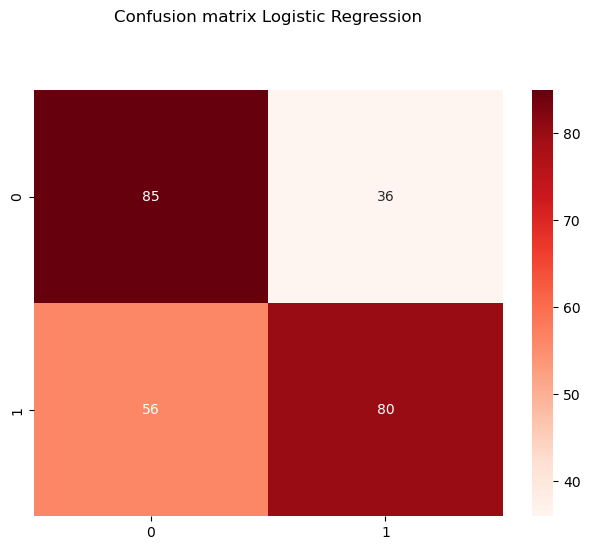

In [79]:
cnf_lr = confusion_matrix(y_test, (lr_cv.predict(X_test)))

sns.heatmap(pd.DataFrame(cnf_lr), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

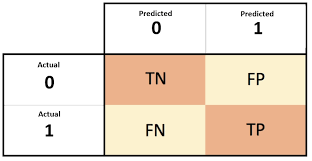

In [80]:
grid={"C": np.logspace(-4,4,50), "penalty":["l1"]}
lr2 = LogisticRegression(solver='liblinear')
lr_cv2 =GridSearchCV(lr, grid, cv=10)
lr_cv2.fit(X_train, y_train)

# Accuracy of training prediction
acc_lr = lr_cv.score(X_train, y_train)
print('Accuracy of training data: ',acc_lr)

print("\n The best score across ALL searched params:\n", (lr_cv.best_params_))
print("\n The best parameters across ALL searched params:\n",(lr_cv.best_score_))

Accuracy of training data:  0.6630963972736125

 The best score across ALL searched params:
 {'C': 1.0, 'penalty': 'l1'}

 The best parameters across ALL searched params:
 0.6650722235377693


In [81]:
#Accuracy of test prediction
lr_pred = lr_cv2.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
prec = precision_score(y_test, lr_pred, average="weighted")
rec = recall_score(y_test, lr_pred, average="weighted") 
spec = recall_score(y_test, lr_pred, average="weighted", pos_label=0)
F1_score = f1_score(y_test, lr_pred, average = 'weighted')
roc_auc = roc_auc_score(y_test, lr_pred)


print(f'Accuracy Score: {round(acc,4)*100}%')
print(f'Precision: {round(prec,4)*100}%')
print(f'Recall: {round(rec,4)*100}%')
print(f'Specificity: {round(spec,4)*100}%')
print(f'F1: {round(F1_score,4)*100}%')
print(f'ROC_AUC: {round(roc_auc,4)*100}%')

Accuracy Score: 64.59%
Precision: 65.33%
Recall: 64.59%
Specificity: 64.59%
F1: 64.52%
ROC_AUC: 64.95%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

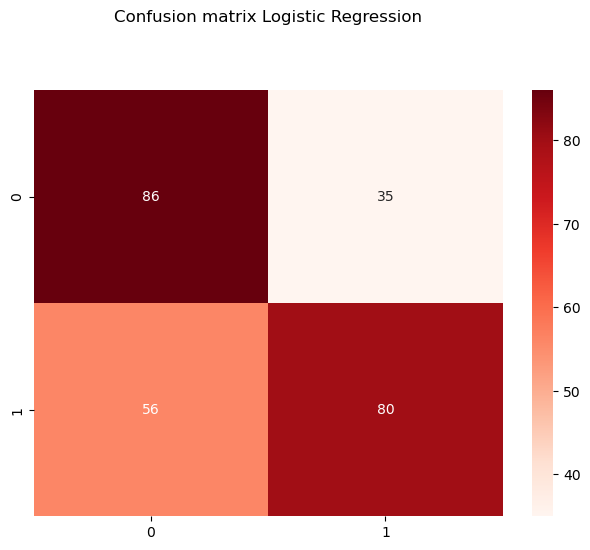

In [82]:
cnf_lr = confusion_matrix(y_test, lr_pred)

sns.heatmap(pd.DataFrame(cnf_lr), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

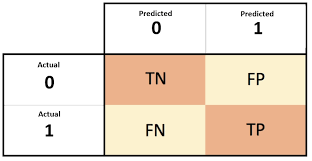

# 4. Support Vector Machine

In [83]:
# Coarse-Grained Support Vector Machine GridSearch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf'],
}
SVM1 = SVC()
grid_SVM1 = GridSearchCV(estimator=SVM1, param_grid = param_grid, refit=True,cv=5, n_jobs=-1, verbose=3)
grid_SVM1.fit(X_train, y_train)

#Parameters
print("\n The best score across ALL searched params:\n",grid_SVM1.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SVM1.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits

 The best score across ALL searched params:
 0.6650674875680797

 The best parameters across ALL searched params:
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Text(0.5, 1.1, 'Confusion matrix Support Vector Machine\n')

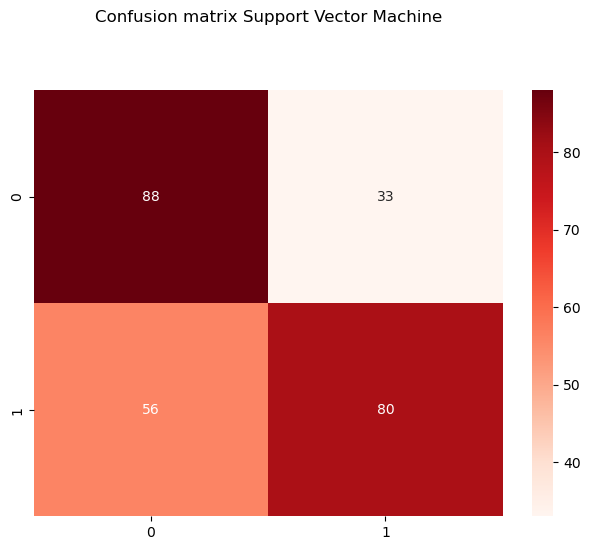

In [84]:
cnf_SVM = confusion_matrix(y_test, (grid_SVM1.predict(X_test)))

sns.heatmap(pd.DataFrame(cnf_SVM), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Support Vector Machine\n', y=1.1)

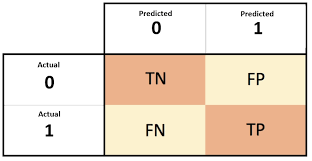

In [85]:
# Refined Support Vector Machine GridSearch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1,5,10,15,20],
    'gamma': [1,2,3,4,5],
    'kernel': ['rbf'],
}
SVM2 = SVC()
grid_SVM2 = GridSearchCV(estimator=SVM2, param_grid = param_grid, refit=True,cv=10, n_jobs=-1, verbose=3)
grid_SVM2.fit(X_train, y_train)

# Accuracy of training prediction
acc_SVM2 = grid_DTC2.score(X_train, y_train)
print('Accuracy of training data: ',acc_SVM2)

#Parameters
print("\n The best score across ALL searched params:\n",grid_SVM2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SVM2.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy of training data:  0.6757546251217137

 The best score across ALL searched params:
 0.6689796306872264

 The best parameters across ALL searched params:
 {'C': 15, 'gamma': 2, 'kernel': 'rbf'}


In [86]:
#Accuracy of test prediction

SVM2_pred = grid_SVM2.predict(X_test)

SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_prec = precision_score(y_test, SVM2_pred, average="weighted")
SVM2_rec = recall_score(y_test, SVM2_pred, average="weighted") 
SVM2_spec = recall_score(y_test, SVM2_pred, average="weighted", pos_label=0)
SVM2_F1_score = f1_score(y_test, SVM2_pred, average = 'weighted')
SVM2_roc_auc = roc_auc_score(y_test, SVM2_pred)

print(f'Accuracy Score: {round(SVM2_acc,4)*100}%')
print(f'Precision: {round(SVM2_prec,4)*100}%')
print(f'Recall: {round(SVM2_rec,4)*100}%')
print(f'Specificity: {round(SVM2_spec,4)*100}%')
print(f'F1: {round(SVM2_F1_score,4)*100}%')
print(f'ROC_AUC: {round(SVM2_roc_auc,4)*100}%')

Accuracy Score: 67.32000000000001%
Precision: 67.93%
Recall: 67.32000000000001%
Specificity: 67.32000000000001%
F1: 67.29%
ROC_AUC: 67.61%


Text(0.5, 1.1, 'Confusion matrix Support Vector Machine\n')

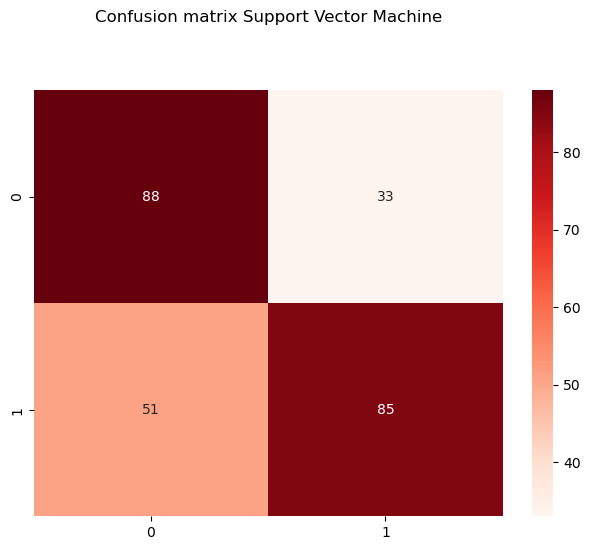

In [87]:
cnf_SVM = confusion_matrix(y_test, SVM2_pred)

sns.heatmap(pd.DataFrame(cnf_SVM), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Support Vector Machine\n', y=1.1)

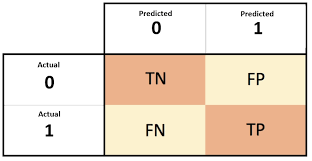

# 5. K-Nearest Neighbor

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
{
    'k_range': range(1,31),
    'n_neighbors': k_range,
    'metric': 'minkowski',
    'p': 2,
}
KNN1 = KNeighborsClassifier()
grid_KNN1 = GridSearchCV(KNN1, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
grid_KNN1.fit(X_train, y_train)

#Parameters
print("\n The best score across ALL searched params:\n",grid_KNN1.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN1.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 The best score across ALL searched params:
 0.6465451101112953

 The best parameters across ALL searched params:
 {'n_neighbors': 23}


Text(0.5, 1.1, 'Confusion matrix K-Nearest Neighbor\n')

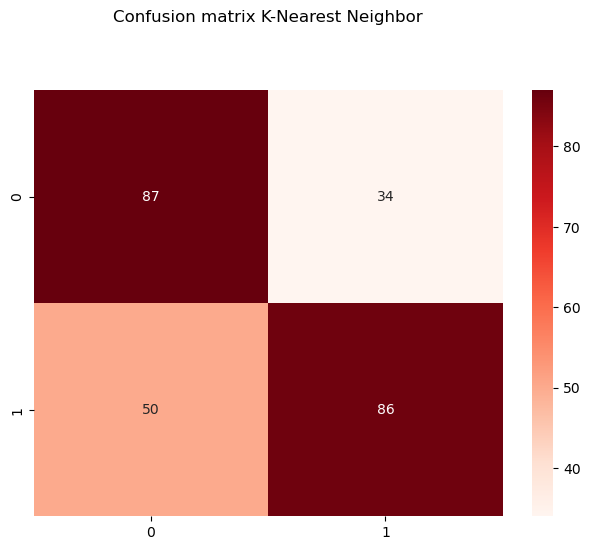

In [89]:
cnf_KNN2 = confusion_matrix(y_test, (grid_KNN1.predict(X_test)))

sns.heatmap(pd.DataFrame(cnf_KNN2), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix K-Nearest Neighbor\n', y=1.1)

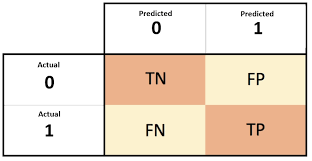

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = list(range(15,31))
param_grid = dict(n_neighbors=k_range)
{
    'k_range': range(23,31),
    'n_neighbors': k_range,
    'metric': 'minkowski',
    'p': 2,
}
KNN2 = KNeighborsClassifier()
grid_KNN2 = GridSearchCV(KNN2, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_KNN2.fit(X_train, y_train)

# Accuracy of training prediction
acc_KNN2 = grid_DTC2.score(X_train, y_train)
print('Accuracy of training data: ',acc_KNN2)

#Parameters
print("\n The best score across ALL searched params:\n",grid_KNN2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN2.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuracy of training data:  0.6757546251217137

 The best score across ALL searched params:
 0.6455549209975252

 The best parameters across ALL searched params:
 {'n_neighbors': 29}


In [91]:
#Accuracy of test prediction

KNN2_pred = grid_KNN1.predict(X_test)

KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_prec = precision_score(y_test, KNN2_pred, average="weighted")
KNN2_rec = recall_score(y_test, KNN2_pred, average="weighted") 
KNN2_spec = recall_score(y_test, KNN2_pred, average="weighted", pos_label=0)
KNN2_F1_score = f1_score(y_test, KNN2_pred, average = 'weighted')
KNN2_roc_auc = roc_auc_score(y_test, KNN2_pred)

print(f'Accuracy Score: {round(KNN2_acc,4)*100}%')
print(f'Precision: {round(KNN2_prec,4)*100}%')
print(f'Recall: {round(KNN2_rec,4)*100}%')
print(f'Specificity: {round(KNN2_spec,4)*100}%')
print(f'F1: {round(KNN2_F1_score,4)*100}%')
print(f'ROC_AUC: {round(KNN2_roc_auc,4)*100}%')

Accuracy Score: 67.32000000000001%
Precision: 67.82000000000001%
Recall: 67.32000000000001%
Specificity: 67.32000000000001%
F1: 67.31%
ROC_AUC: 67.57%


Text(0.5, 1.1, 'Confusion matrix K-Nearest Neighbor\n')

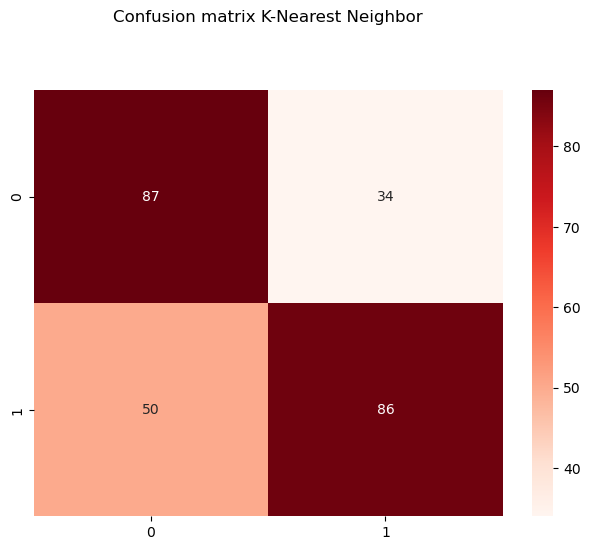

In [92]:
cnf_KNN2 = confusion_matrix(y_test, KNN2_pred)

sns.heatmap(pd.DataFrame(cnf_KNN2), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix K-Nearest Neighbor\n', y=1.1)

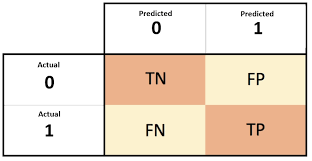

# ML Model Results and Discussion

1. Random Forest Classifier
2. Decision Tree Classifier
3. Logistic Regression
4. Support Vector Machine
5. K-nearest neighbor


In [128]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tabulate import tabulate

all_data1 = [['Models', 'Item', 'Test', 'Training'],
['Decision Tree', 'Accuracy', DTC_acc, acc_DTC2],
[' ', 'Precision', DTC_prec],
[' ', 'Recall', DTC_rec],
[' ', 'Specificity', DTC_spec],
[' ', 'F1_score', DTC_F1_score],
[' ', 'ROC_AUC', DTC_roc_auc]]

all_data2 = [['Random Forest', 'Accuracy',RFC_acc,acc_RFC3],
[' ', 'Precision', RFC_prec],
[' ', 'Recall', RFC_rec],
[' ', 'Specificity', RFC_spec],
[' ', 'F1_score', RFC_F1_score],
[' ', 'ROC_AUC', RFC_roc_auc]]
            
all_data3 = [['Logist Regress', 'Accuracy',acc,acc_lr],
[' ', 'Precision', prec],
[' ', 'Recall', rec],
[' ', 'Specificity', spec],
[' ', 'F1_score', F1_score],
[' ', 'ROC_AUC',roc_auc]]

all_data4 = [['Support Vector', 'Accuracy',SVM2_acc, acc_SVM2],
[' ', 'Precision', SVM2_prec],
[' ', 'Recall', SVM2_rec],
[' ', 'Specificity', SVM2_spec],
[' ', 'F1_score',SVM2_F1_score],
[' ', 'ROC_AUC',SVM2_roc_auc]]

all_data5 = [['KNearest Neigh', 'Accuracy',KNN2_acc,acc_KNN2],
[' ', 'Precision', KNN2_prec],
[' ', 'Recall', KNN2_rec],
[' ', 'Specificity', KNN2_spec],
[' ', 'F1_score', KNN2_F1_score],
[' ', 'ROC_AUC',KNN2_roc_auc]]

print(tabulate(all_data1, headers='firstrow', tablefmt='fancy_grid'))
print("                                        ")
print(tabulate(all_data2,tablefmt='fancy_grid'))
#print("--------------------------------------")
print(tabulate(all_data3,tablefmt='fancy_grid'))
#print("--------------------------------------")
print(tabulate(all_data4,tablefmt='fancy_grid'))
#print("--------------------------------------")
print(tabulate(all_data5,tablefmt='fancy_grid'))



print(f'Best Model: Support Vector Machine')
print(f'Accuracy Score: {round(acc,4)*100}%')
print(f'Precision: {round(prec,4)*100}%')
print(f'Recall: {round(rec,4)*100}%')
print(f'Specificity: {round(spec,4)*100}%')
print(f'F1: {round(F1_score,4)*100}%')
print(f'ROC_AUC: {round(roc_auc,4)*100}%')

╒═══════════════╤═════════════╤══════════╤════════════╕
│ Models        │ Item        │     Test │   Training │
╞═══════════════╪═════════════╪══════════╪════════════╡
│ Decision Tree │ Accuracy    │ 0.669261 │   0.689387 │
├───────────────┼─────────────┼──────────┼────────────┤
│               │ Precision   │ 0.674807 │            │
├───────────────┼─────────────┼──────────┼────────────┤
│               │ Recall      │ 0.669261 │            │
├───────────────┼─────────────┼──────────┼────────────┤
│               │ Specificity │ 0.669261 │            │
├───────────────┼─────────────┼──────────┼────────────┤
│               │ F1_score    │ 0.66909  │            │
├───────────────┼─────────────┼──────────┼────────────┤
│               │ ROC_AUC     │ 0.672004 │            │
╘═══════════════╧═════════════╧══════════╧════════════╛
                                        
╒═══════════════╤═════════════╤══════════╤══════════╕
│ Random Forest │ Accuracy    │ 0.657588 │ 0.821811 │
├──────────

# Model Selection: Support Vector Machine


╒════════════════╤═════════════╤══════════╤══════════╕
│ Support Vector │ Accuracy    │ 0.673152 │ 0.675755 │
├────────────────┼─────────────┼──────────┼──────────┤
│                │ Precision   │ 0.679262 │          │
├────────────────┼─────────────┼──────────┼──────────┤
│                │ Recall      │ 0.673152 │          │
├────────────────┼─────────────┼──────────┼──────────┤
│                │ Specificity │ 0.673152 │          │
├────────────────┼─────────────┼──────────┼──────────┤
│                │ F1_score    │ 0.672884 │          │
├────────────────┼─────────────┼──────────┼──────────┤
│                │ ROC_AUC     │ 0.676136 │          │
╘════════════════╧═════════════╧══════════╧══════════╛


Text(0.5, 1.1, 'Confusion matrix Support Vector Machine\n')

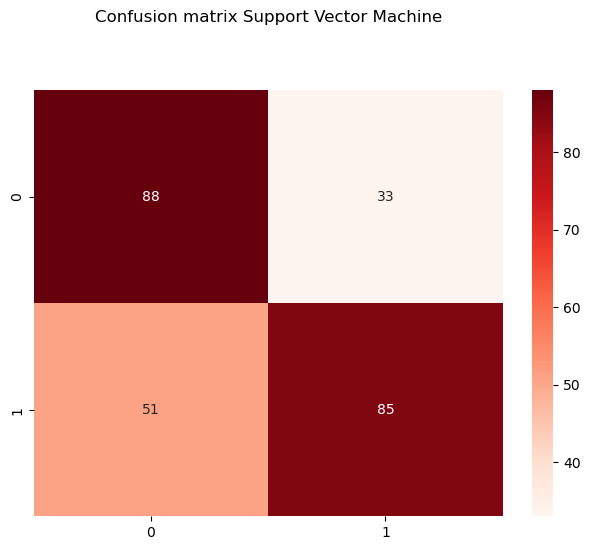

In [143]:
#Accuracy of test prediction

SVM2_pred = grid_SVM2.predict(X_test)

SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_prec = precision_score(y_test, SVM2_pred, average="weighted")
SVM2_rec = recall_score(y_test, SVM2_pred, average="weighted") 
SVM2_spec = recall_score(y_test, SVM2_pred, average="weighted", pos_label=0)
SVM2_F1_score = f1_score(y_test, SVM2_pred, average = 'weighted')
SVM2_roc_auc = roc_auc_score(y_test, SVM2_pred)

print(tabulate(all_data4,tablefmt='fancy_grid'))
cnf_SVM = confusion_matrix(y_test, SVM2_pred)

sns.heatmap(pd.DataFrame(cnf_SVM), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix Support Vector Machine\n', y=1.1)

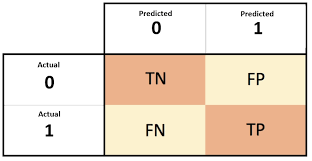

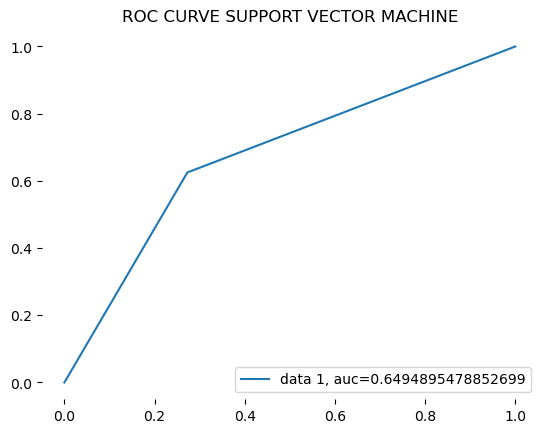

The score for the AUC ROC Curve is: 64.9%


In [95]:
fpr, tpr, _ = roc_curve(y_test, SVM2_pred)
auc = roc_auc_score(y_test, lr_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE SUPPORT VECTOR MACHINE')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")


In [182]:
print(classification_report(y_test,SVM2_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68       121
         1.0       0.72      0.62      0.67       136

    accuracy                           0.67       257
   macro avg       0.68      0.68      0.67       257
weighted avg       0.68      0.67      0.67       257



# Results

# Discussion

Support Vector Machine (SVM) was the best choice out of the 5 models test. It provided the most True Positive and True Negative cases out of the rest. While the models were comparable, SVM showed slightly better metrics compared to the other models

Some of the limitations of the study include the small sample amount after the data normalization between the cases of those with heart disease and those without heart disease. Because of the normalization, the data sample was reduced to 
n = 1284. Furthermore, while data normalization is a dilligent technique to avoid prediction bias, the number of features and the small sample size influenced the accuracy nd precision of the models. 

# Model User-Interface Demonstration

# Export Data

In [183]:
data_scaled.shape

(1284, 10)

In [176]:
data_scaled.to_csv('data_scaled.csv')

In [181]:
model =grid_SVM2
pkl_filename = 'model.pkl'

import pickle
pickle.dump(model, open('model.pkl', 'wb'))
